# ****ASSIGNMENT 8**** #

## **Performing Principal Component Analysis (PCA)** ##
#### **Doing PCA i.e., dimentionality reduction and clustering using first 3 principal component scores** ####
#### ***Peforming Clustering for Wine Data using hierarchical and K means clustering and checking if same number of clusters are derived*** ####

File : wine.csv

In [555]:

import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch # to build dendrogram and build the plotting
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


palette_color = sns.color_palette('rainbow')
import warnings
warnings.filterwarnings('ignore')

### **Importing data from file wine.csv**

In [556]:
# Reading the data from the file 'wine.csv'
wine = pd.read_csv("wine.csv")
wine.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

### **EDA (Exploratory Data Analysis)**

In [557]:
wine.shape

(178, 14)

#### *Descriptive Analysis* ####

In [558]:
wine.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [559]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


#### *Checking for missing values*

In [560]:
# check for missing values
wine.isna().sum() # The result shows that there are no missing values

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

#### *Checking for Null Values*

In [561]:
# Checking to see if there are any null values
# We can get this information using wine.info() option as well
wine.isnull().sum() # The result shows that there are no null values

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

#### *Checking for duplicates*

In [562]:
# Checking for Duplicate Values
wine.duplicated()  # if any 2 rows has same values

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [563]:
# Count of duplicated rows
wine[wine.duplicated()].shape # We see that there are no duplicates

(0, 14)

In [564]:
# Print the duplicated rows. Since we have duplicates it will show us the record
wine[wine.duplicated()] # There are no duplicates

Empty DataFrame
Columns: [Type, Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline]
Index: []

#### *Checking the data structure* ####

In [565]:
# Data Structure
print(type(wine))
wine.shape

<class 'pandas.core.frame.DataFrame'>


(178, 14)

In [566]:
# Checking data types
wine.dtypes # check data types of all variables

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [567]:
wine_data = wine.iloc[:,1:] # Ignoring the column ID as it has less relevance
wine_data.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [568]:
wine_data.shape # Not considering Type as that is being considered as the dependent 'y' variable and the remaining 13 are independent 'x' variables.

(178, 13)

#### **Visualizations** ####

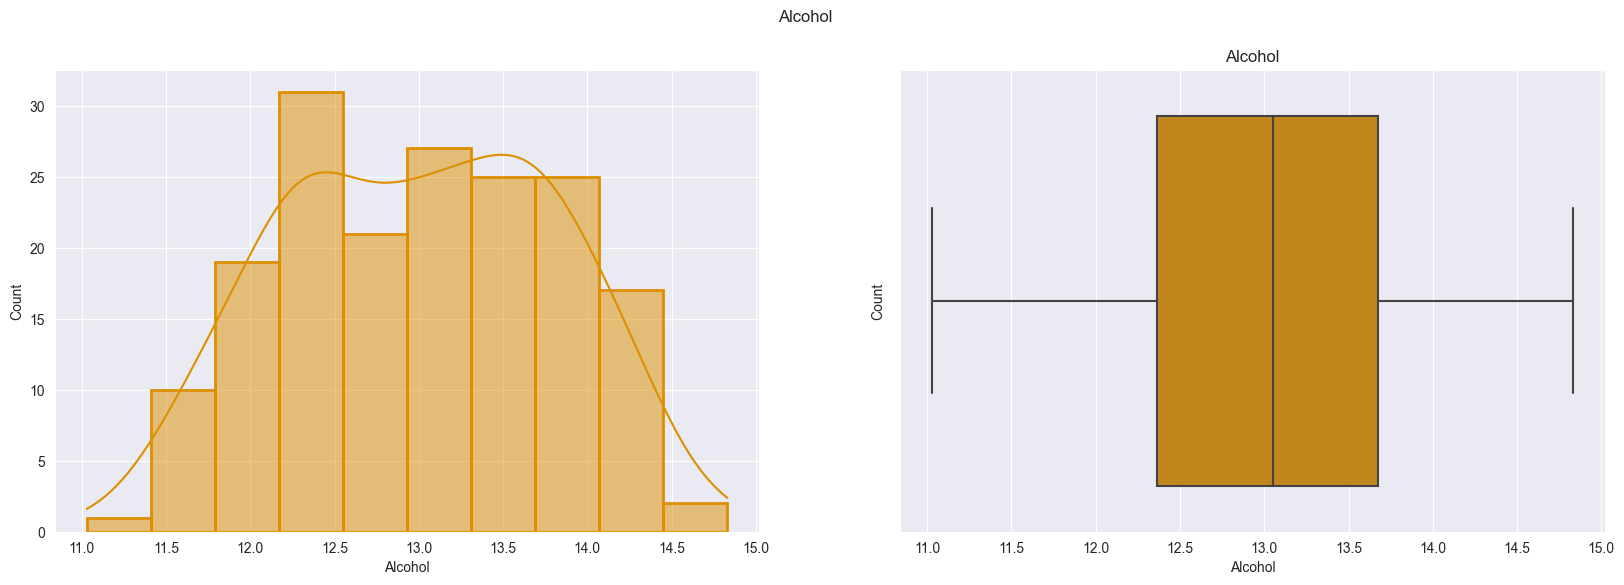

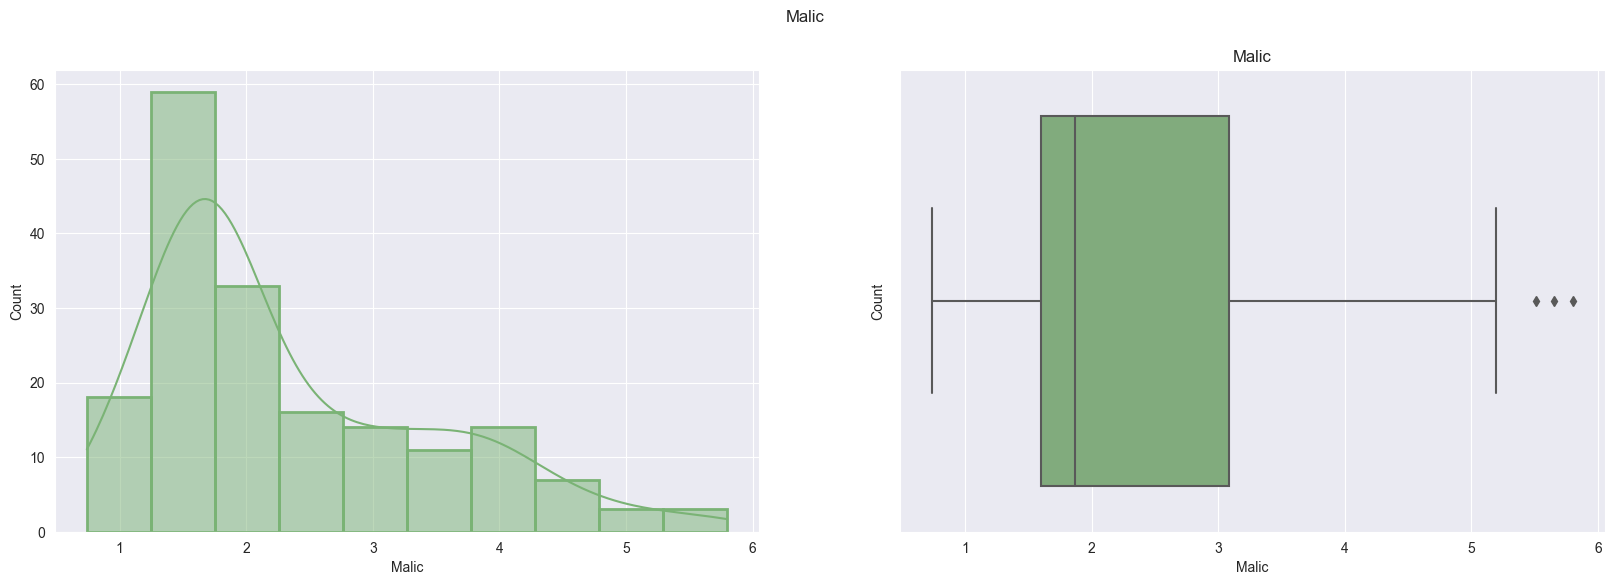

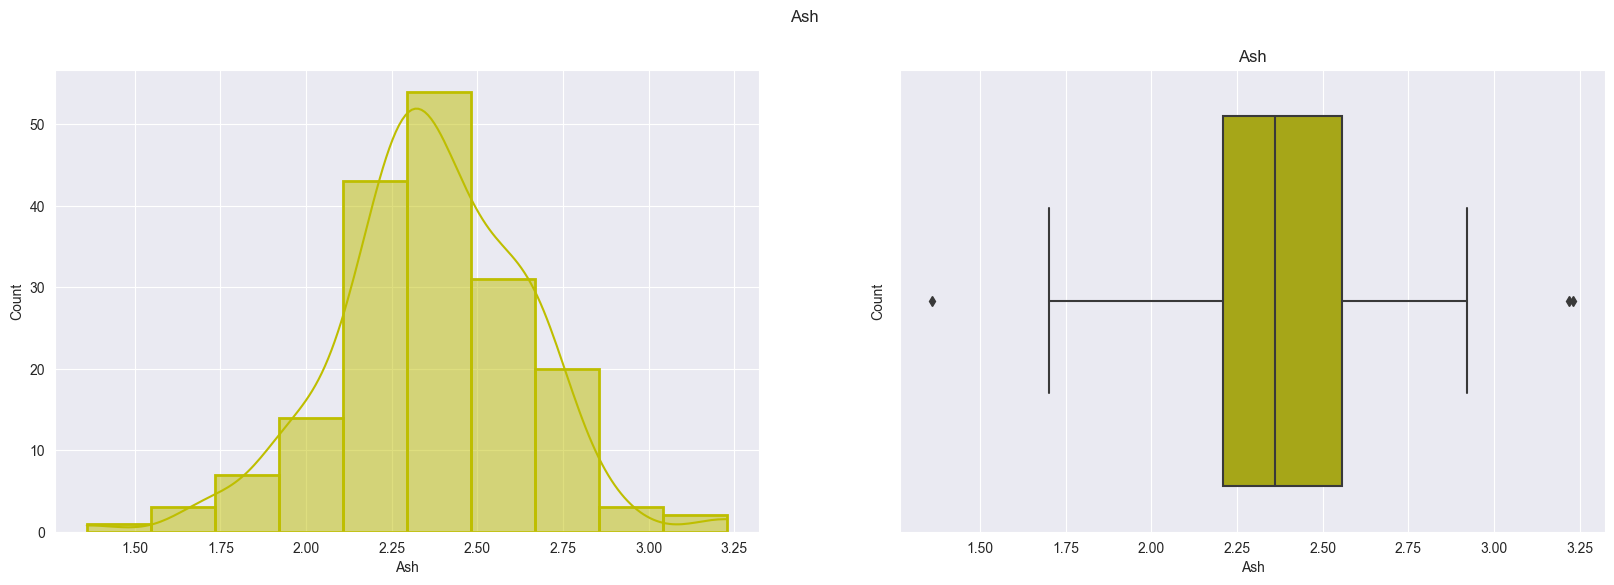

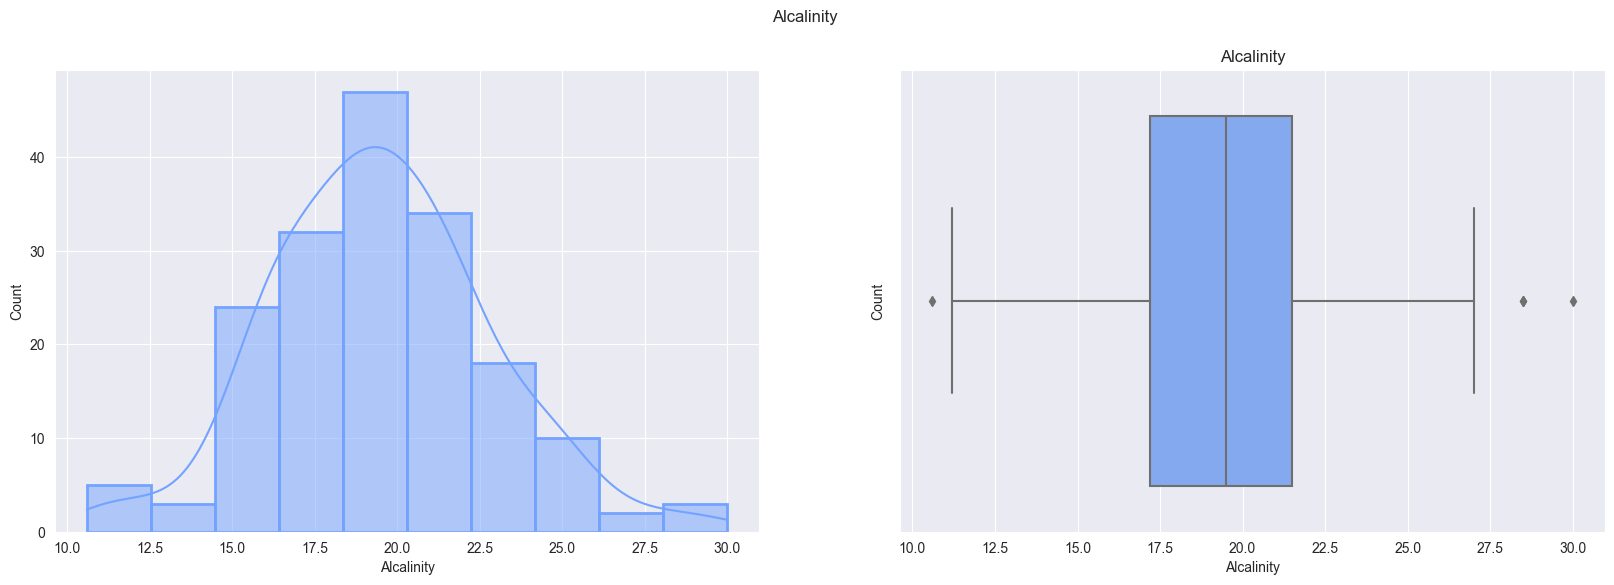

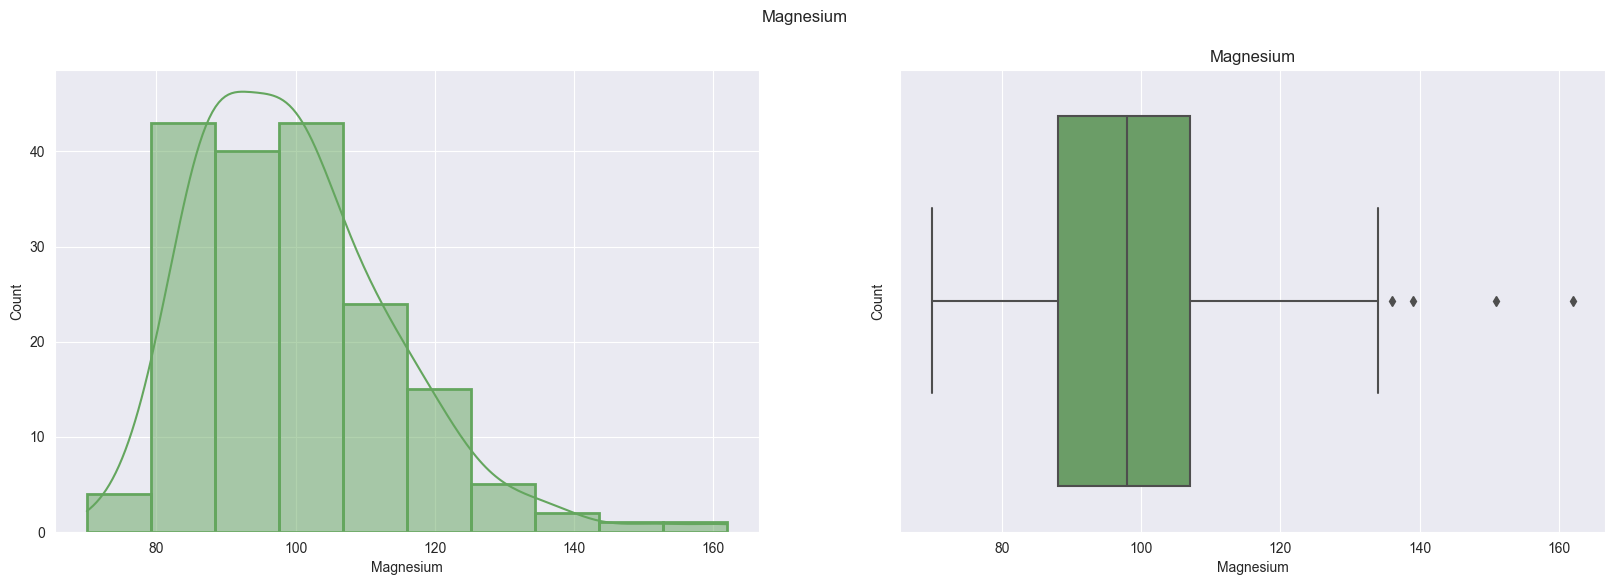

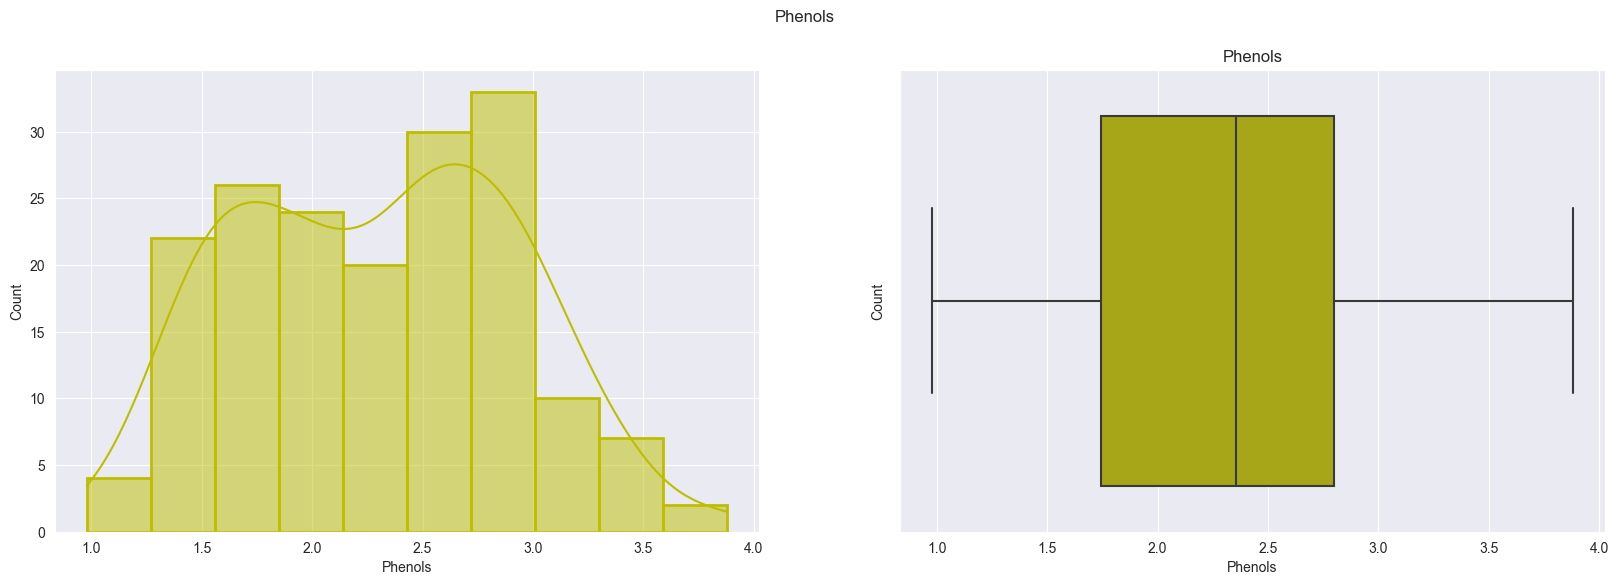

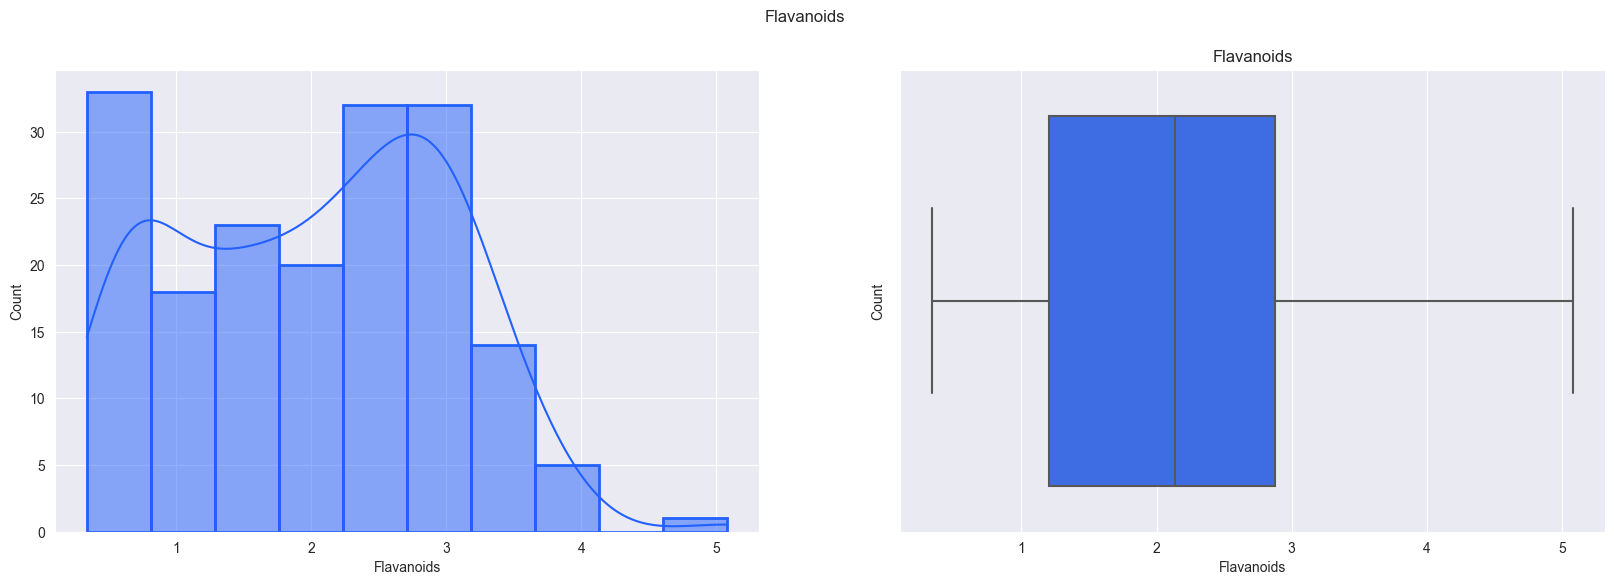

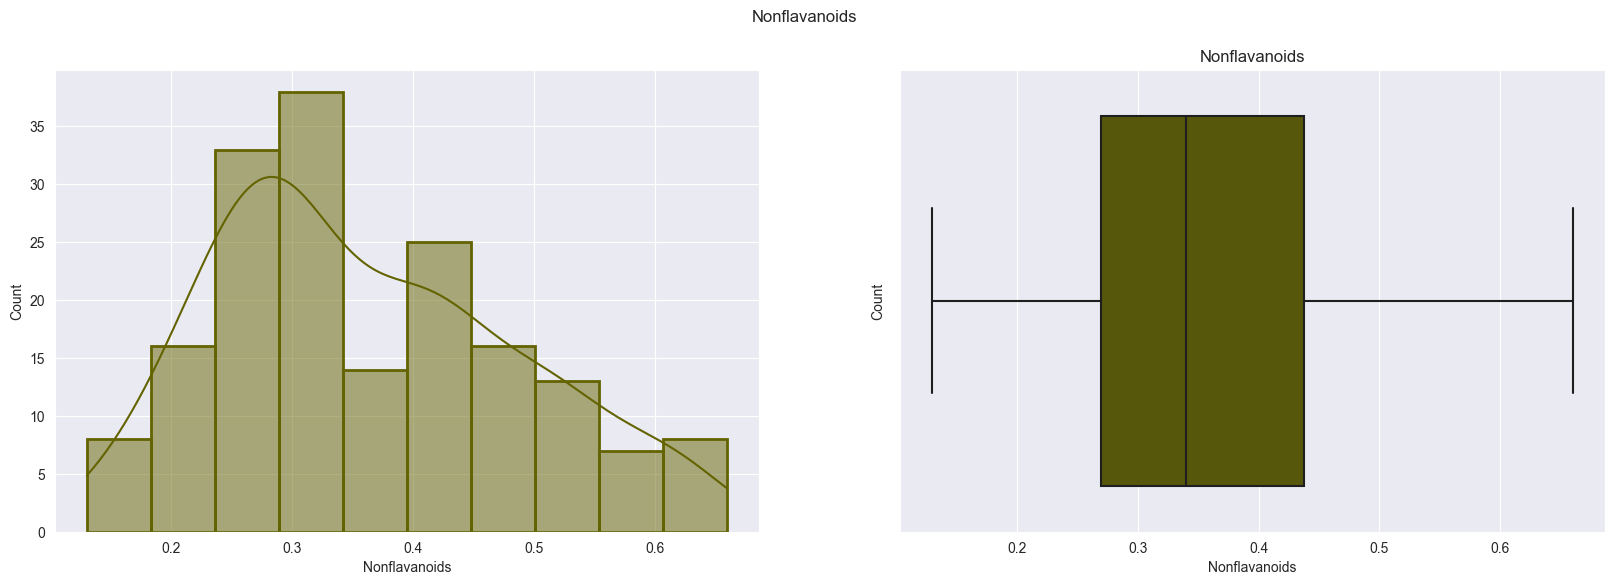

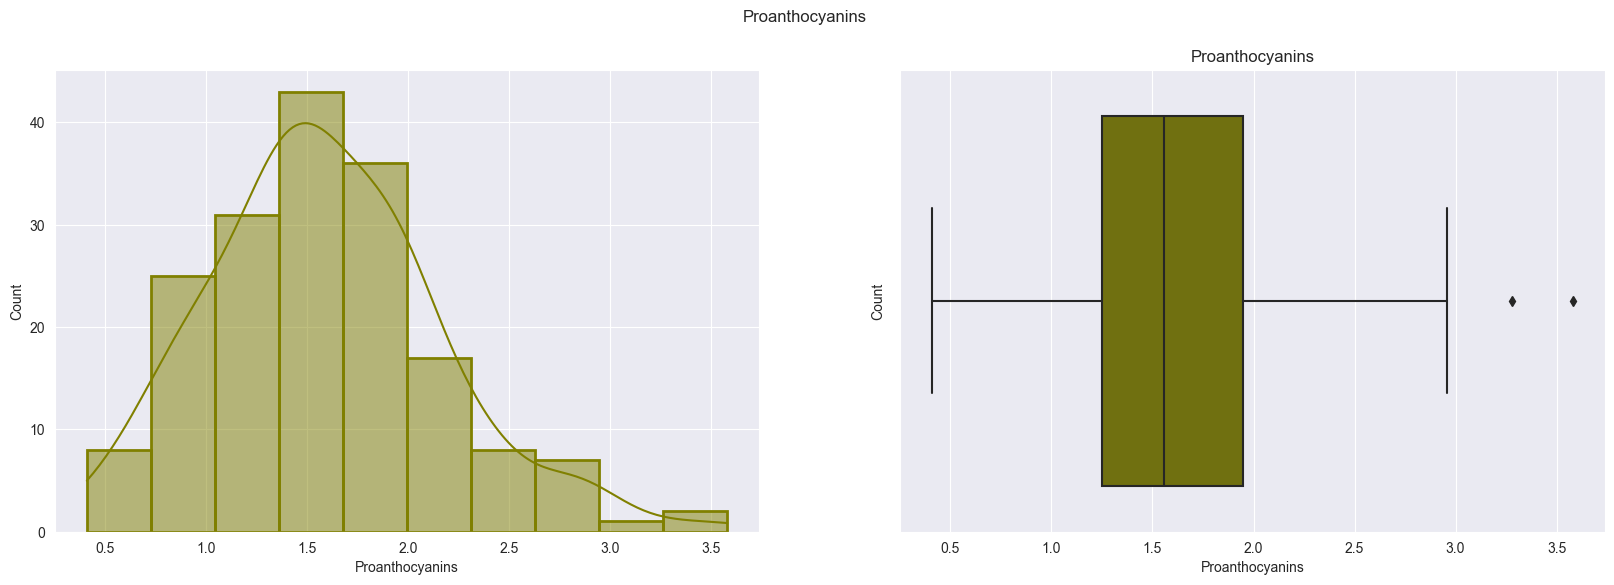

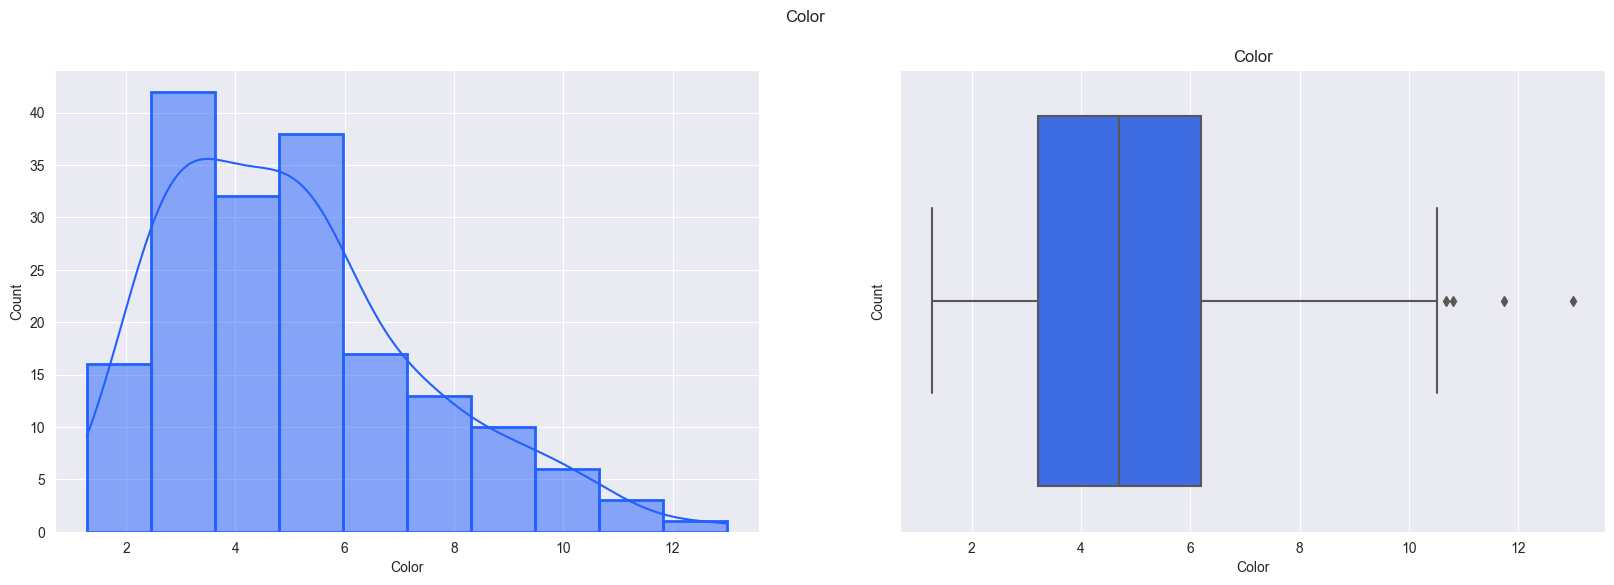

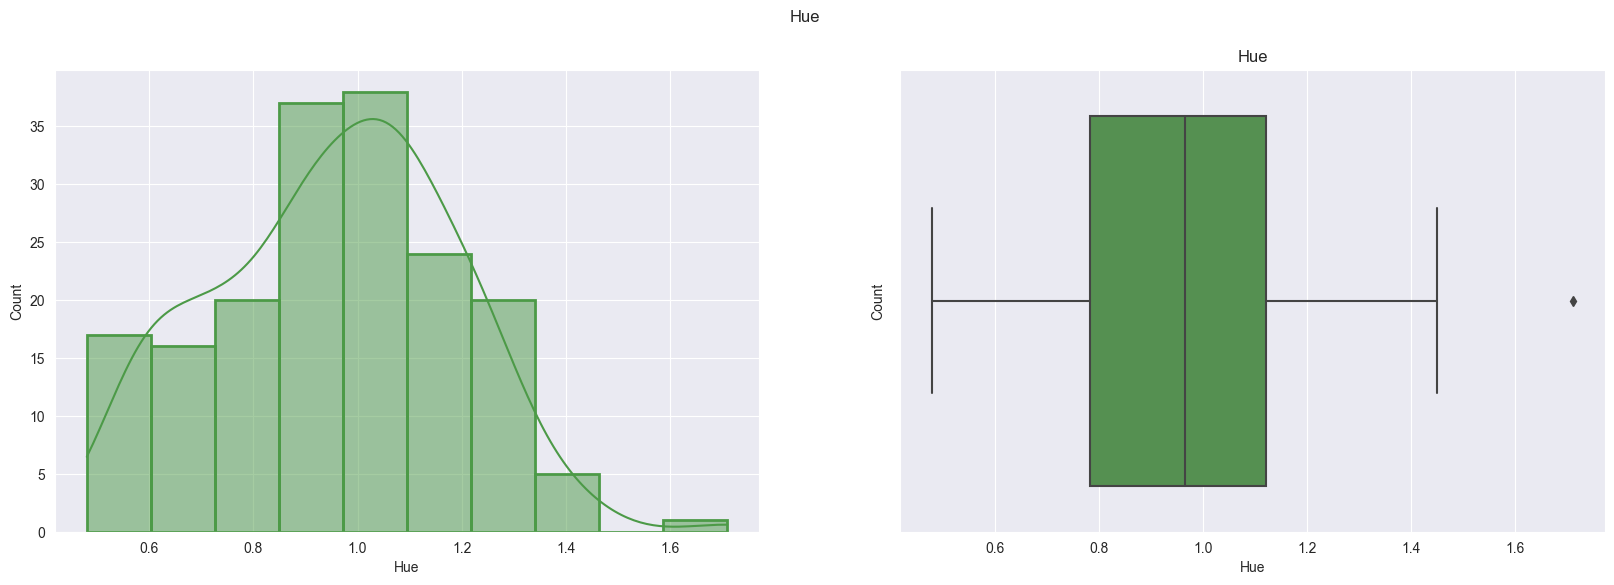

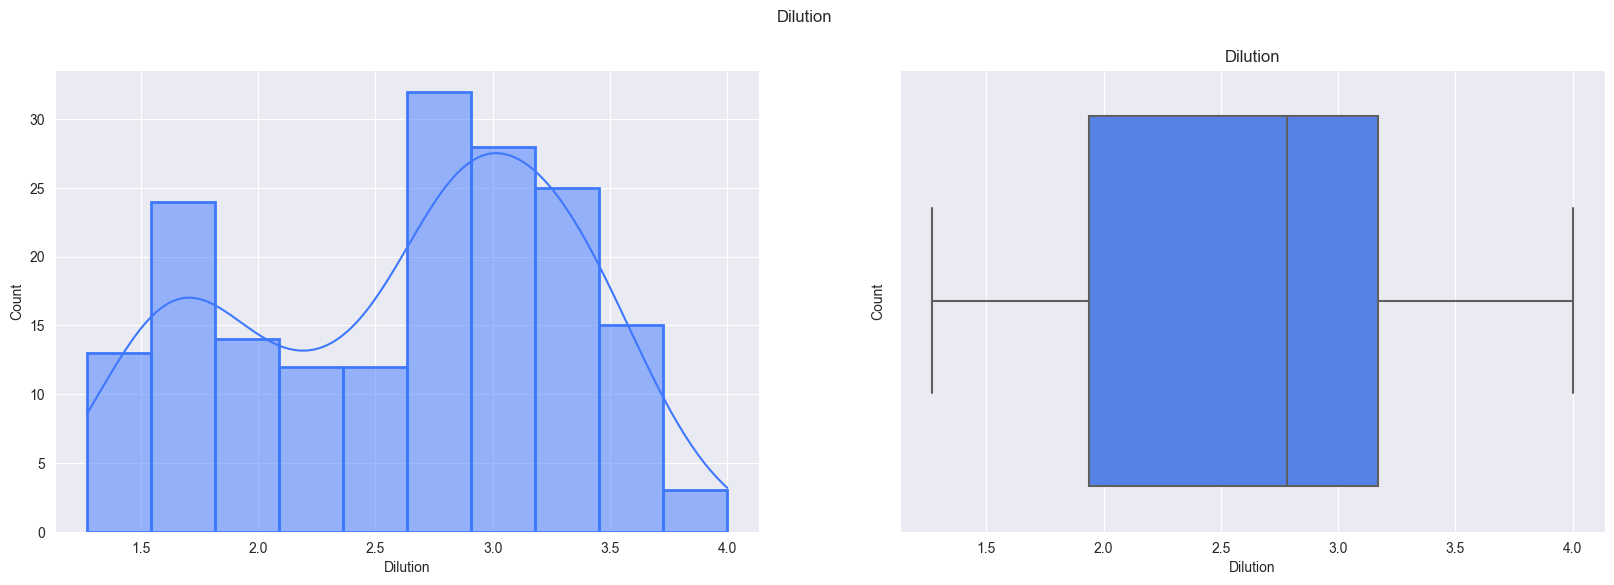

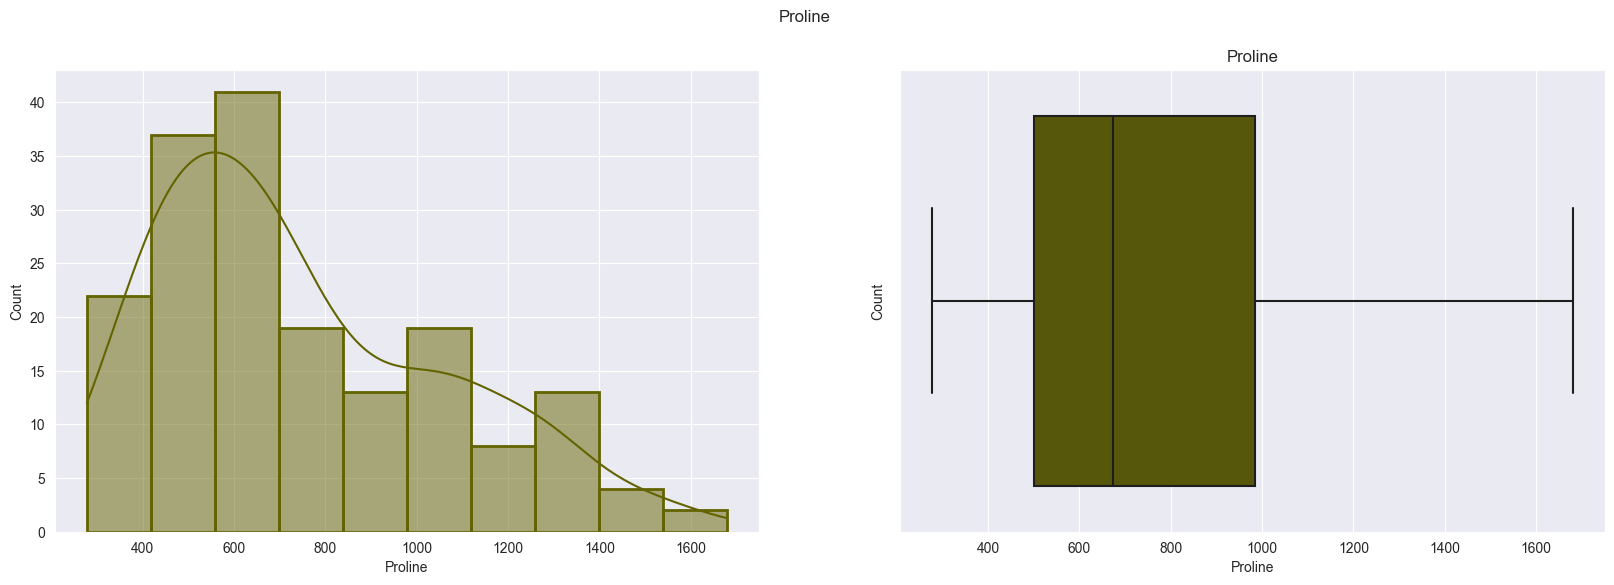

In [569]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):

    # Using Matplotlib

    #plt.figure(figsize=(16,6))
    #plt.subplot(1,2,1)
    #data[feature].hist()
    #plt.subplot(1,2,2)
    #plt.boxplot(data[feature])
    
    
    # Seaborn
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)

    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=feature, color=color)
    plt.ylabel('Count')
    plt.suptitle(feature)

for cols in wine_data.columns:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(wine_data,cols)
    plt.title(cols)

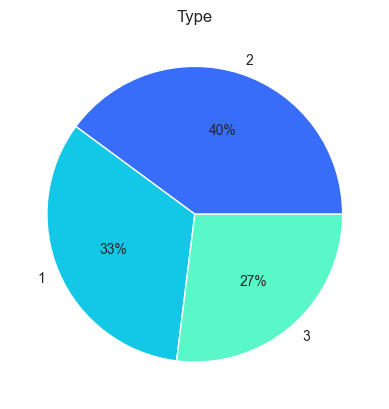

In [570]:
# Segregation of the wine 'Type', which is the y parameter

import matplotlib.pyplot as plt
import seaborn as sns

palette_color = sns.color_palette('rainbow')[0:7]

# Display state data in a form of Pie Graph
values = wine['Type'].value_counts().keys().tolist()
counts = wine['Type'].value_counts().tolist()
values, counts
plt.pie(wine['Type'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')
plt.title('Type')
plt.show()

### **Checking the Correllation between columns** ###

In [571]:
wine_data.corr()

Alcohol     Malic       Ash  Alcalinity  Magnesium  \
Alcohol          1.000000  0.094397  0.211545   -0.310235   0.270798   
Malic            0.094397  1.000000  0.164045    0.288500  -0.054575   
Ash              0.211545  0.164045  1.000000    0.443367   0.286587   
Alcalinity      -0.310235  0.288500  0.443367    1.000000  -0.083333   
Magnesium        0.270798 -0.054575  0.286587   -0.083333   1.000000   
Phenols          0.289101 -0.335167  0.128980   -0.321113   0.214401   
Flavanoids       0.236815 -0.411007  0.115077   -0.351370   0.195784   
Nonflavanoids   -0.155929  0.292977  0.186230    0.361922  -0.256294   
Proanthocyanins  0.136698 -0.220746  0.009652   -0.197327   0.236441   
Color            0.546364  0.248985  0.258887    0.018732   0.199950   
Hue             -0.071747 -0.561296 -0.074667   -0.273955   0.055398   
Dilution         0.072343 -0.368710  0.003911   -0.276769   0.066004   
Proline          0.643720 -0.192011  0.223626   -0.440597   0.393351   

                  Phenols  Flavanoids  Nonflavanoids  Proanthocyanins  \
Alcohol          0.289101    0.236815      -0.155929         0.136698   
Malic           -0.335167   -0.411007       0.292977        -0.220746   
Ash              0.128980    0.115077       0.186230         0.009652   
Alcalinity      -0.321113   -0.351370       0.361922        -0.197327   
Magnesium        0.214401    0.195784      -0.256294         0.236441   
Phenols          1.000000    0.864564      -0.449935         0.612413   
Flavanoids       0.864564    1.000000      -0.537900         0.652692   
Nonflavanoids   -0.449935   -0.537900       1.000000        -0.365845   
Proanthocyanins  0.612413    0.652692      -0.365845         1.000000   
Color           -0.055136   -0.172379       0.139057        -0.025250   
Hue              0.433681    0.543479      -0.262640         0.295544   
Dilution         0.699949    0.787194      -0.503270         0.519067   
Proline          0.498115    0.494193      -0.311385         0.330417   

                    Color       Hue  Dilution   Proline  
Alcohol          0.546364 -0.071747  0.072343  0.643720  
Malic            0.248985 -0.561296 -0.368710 -0.192011  
Ash              0.258887 -0.074667  0.003911  0.223626  
Alcalinity       0.018732 -0.273955 -0.276769 -0.440597  
Magnesium        0.199950  0.055398  0.066004  0.393351  
Phenols         -0.055136  0.433681  0.699949  0.498115  
Flavanoids      -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids    0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins -0.025250  0.295544  0.519067  0.330417  
Color            1.000000 -0.521813 -0.428815  0.316100  
Hue             -0.521813  1.000000  0.565468  0.236183  
Dilution        -0.428815  0.565468  1.000000  0.312761  
Proline          0.316100  0.236183  0.312761  1.000000

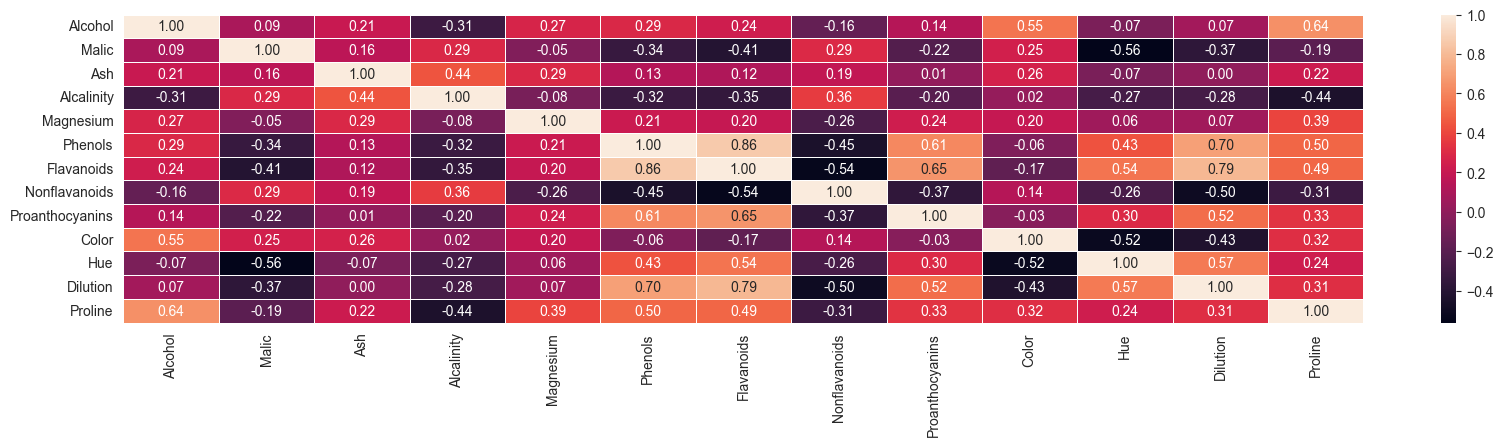

In [572]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(20,4))
sns.heatmap(wine_data.corr(), annot=True, linewidths =.5, fmt ='.2f',ax=ax)
plt.show()

#### **Inferences:** ####
- There is high positive correlation between **'Phenols'** and **'Flavanoids'**
- There is high positive correlation between **'Dilution'** and **'Flavanoids'**
- There is high positive correlation between **'Dilution'** and **'Phenols'**
- There is positive correlation between **'Proanthocyanins'** and **'Flavanoids'**
- There is positive correlation between **'Alcohol'** and **'Proline'**
- There is positive correlation between **'Proanthocyanins'** and **'Phenols'**
- There is positive correlation between **'Alcohol'** and **'Color'**
- There is positive correlation between **'Hue'** and **'Flavanoids'**
- There is positive correlation between **'Hue'** and **'Phenols'**

On the contrary -
- There is a high negative correlation between **'Hue'** and **'Malic'**
- There is a high negative correlation between **'Flavanoids'** and **'Nonflavanoids'**
- There is a negative correlation between **'Hue'** and **'Color'**
- There is a negative correlation between **'Dilution'** and **'Nonflavanoids'**
- There is a negative correlation between **'Phenols'** and **'Nonflavanoids'**
- There is a negative correlation between **'Dilution'** and **'Color'**


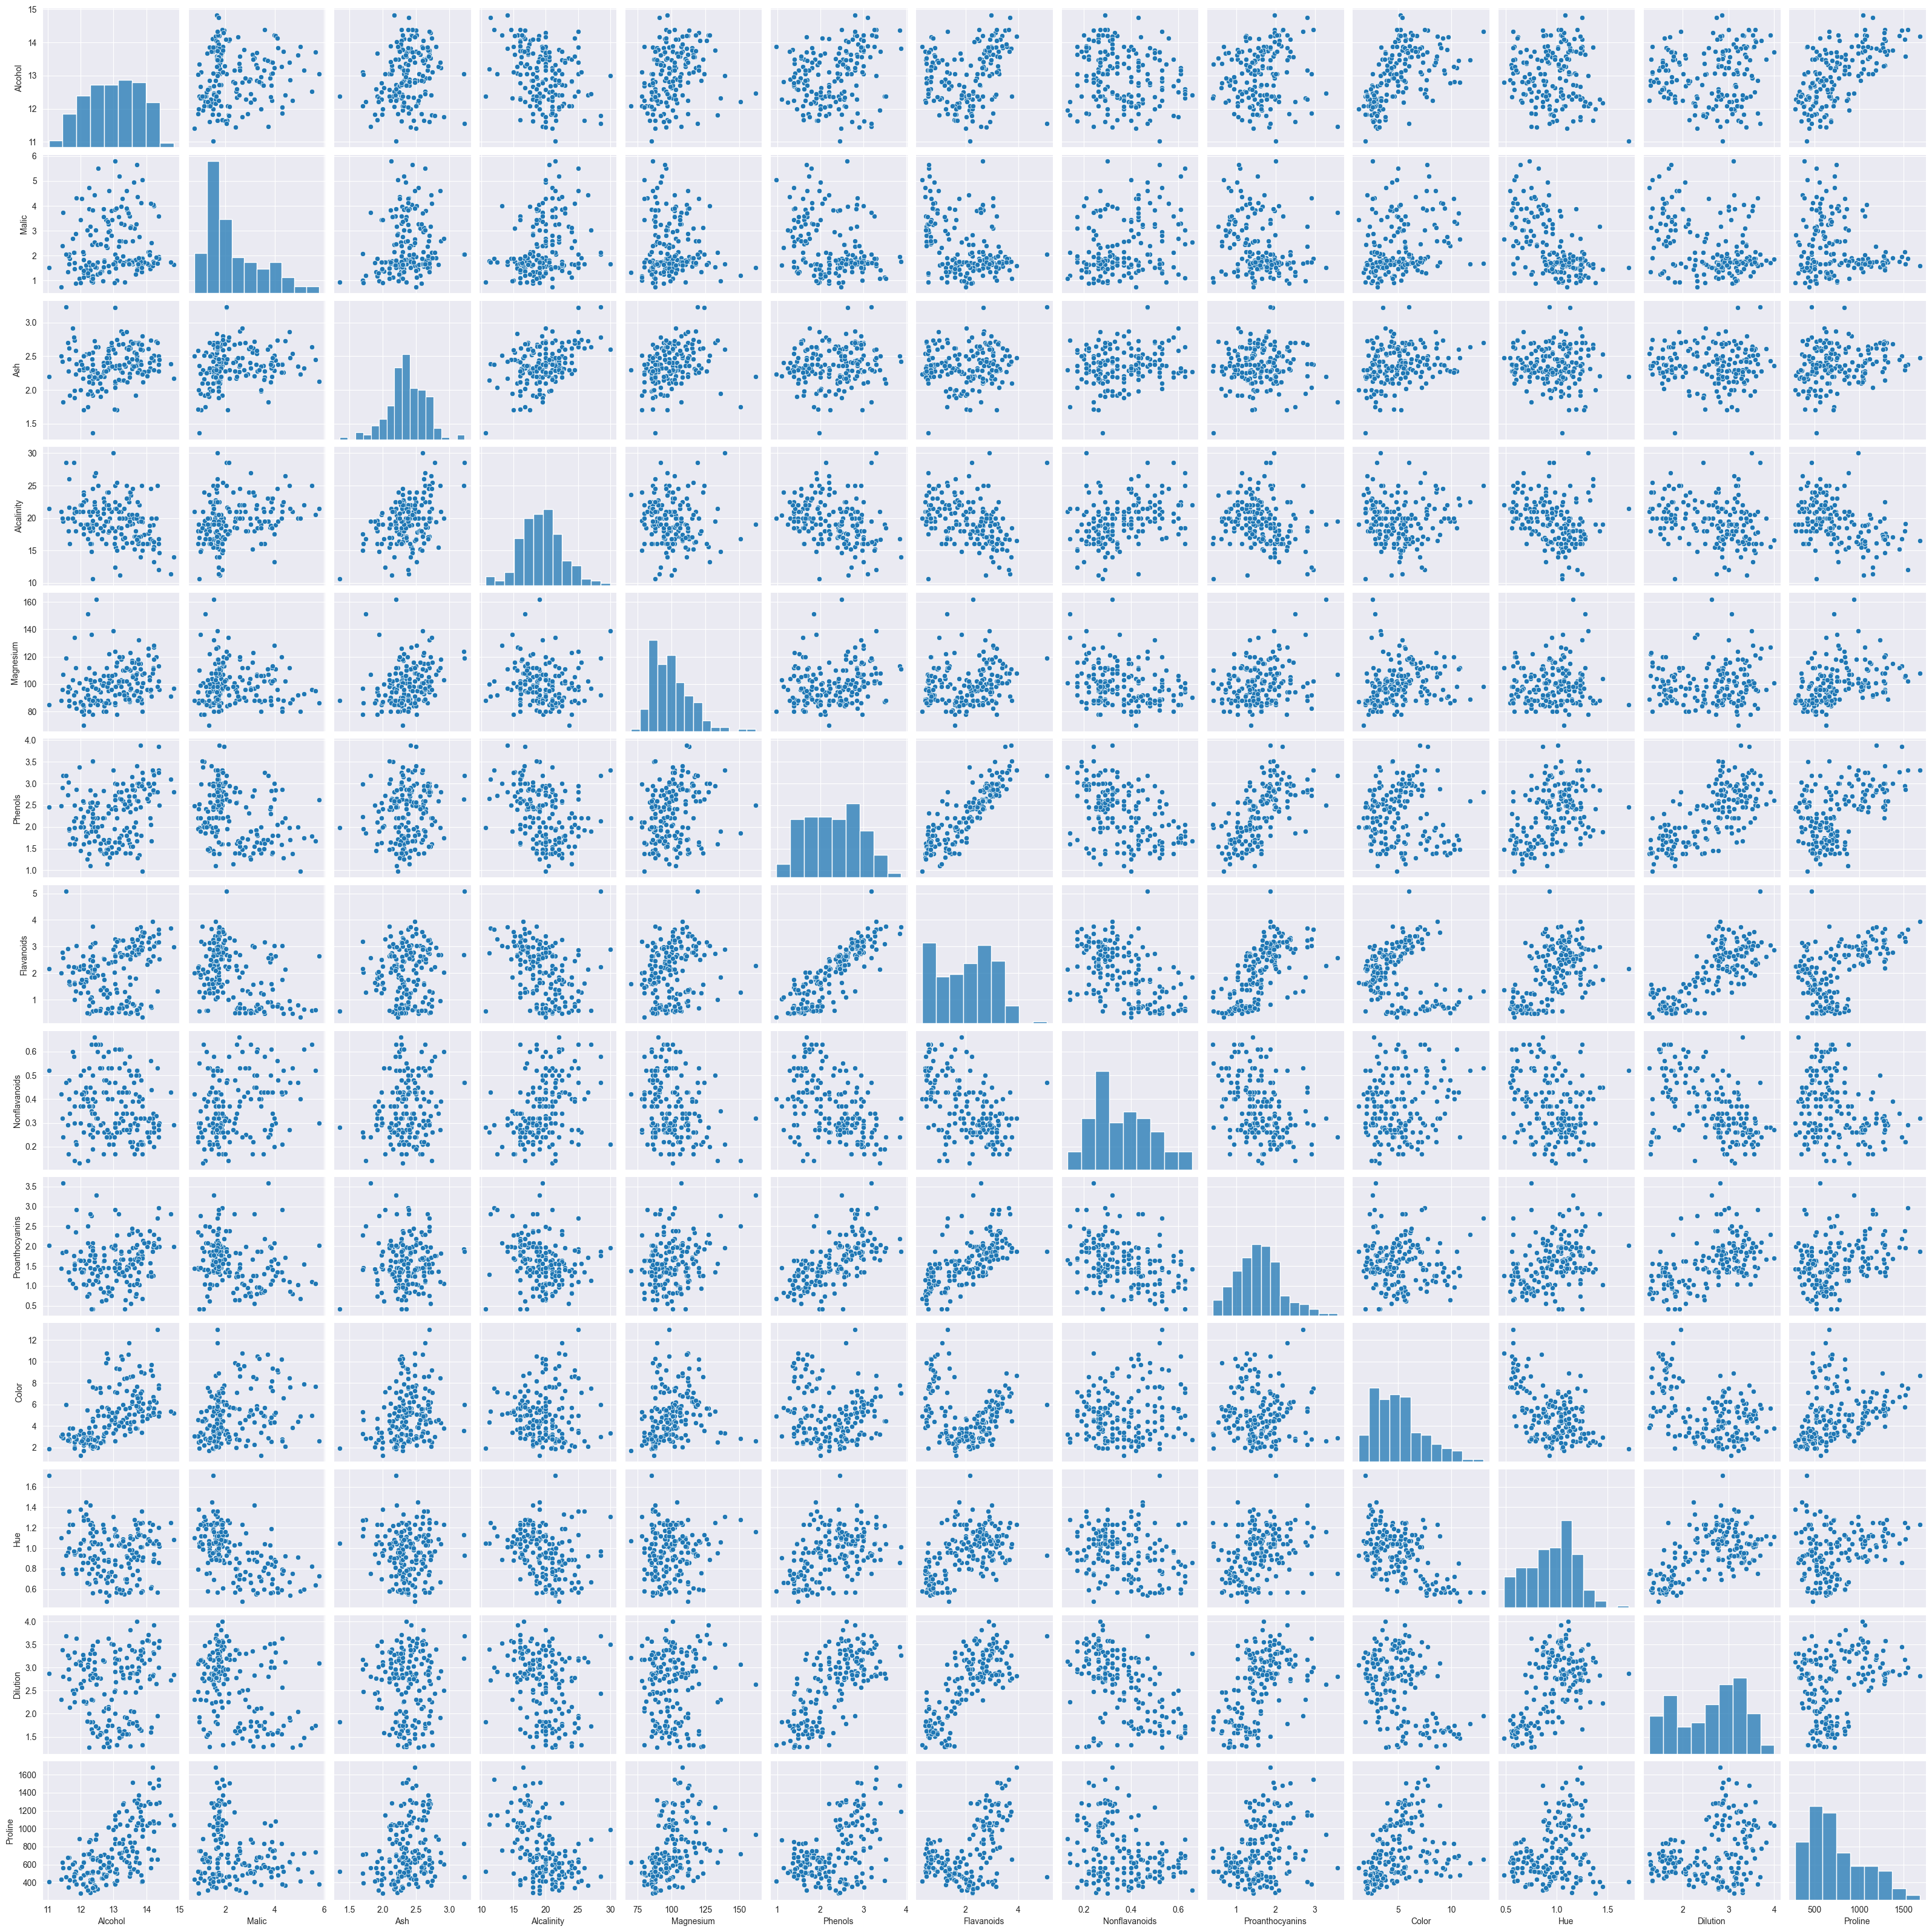

In [573]:
# Format the plot background and scatter plots for all the variables
# The above inferences are seen visually in the below scatter plots
sns.set_style(style='darkgrid')
sns.pairplot(wine_data)

## **PCA STEPS** ##

- PCA works on only normalized or standardized data. Hence, we have to convert the given data into maximum and minimum values
- Creating the Covariance Matrix from the converted data, using the cov() function in the numpy package
- Calculating the Eigen values and Eigen Vectors from the Covariance Matrix, using the eig() function of 'linalg'(linear algebra) module in numpy package
- Extracting the maximum Eigen values and corresponding Eigen Vectors
- Projecting the data on the Eigen Vectors with the dot operation, using the dot() method
- Applying the reduced dimensionality in any model i.e. Hierarchical and K-Means as required

### **Using StandardScaler for Standardization** ###

In [574]:
wine_data.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [575]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_data_std = pd.DataFrame()

wine_data_std[['Alcohol','Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline']] = scaler.fit_transform(wine_data[['Alcohol','Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline']])
wine_data_std

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0    1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997   
1    0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648   
2    0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997   
3    1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446   
4    0.295700  0.227694  1.840403    0.451946   1.281985  0.808997   
..        ...       ...       ...         ...        ...       ...   
173  0.876275  2.974543  0.305159    0.301803  -0.332922 -0.985614   
174  0.493343  1.412609  0.414820    1.052516   0.158572 -0.793334   
175  0.332758  1.744744 -0.389355    0.151661   1.422412 -1.129824   
176  0.209232  0.227694  0.012732    0.151661   1.422412 -1.033684   
177  1.395086  1.583165  1.365208    1.502943  -0.262708 -0.392751   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      1.034819      -0.659563         1.224884  0.251717  0.362177  1.847920   
1      0.733629      -0.820719        -0.544721 -0.293321  0.406051  1.113449   
2      1.215533      -0.498407         2.135968  0.269020  0.318304  0.788587   
3      1.466525      -0.981875         1.032155  1.186068 -0.427544  1.184071   
4      0.663351       0.226796         0.401404 -0.319276  0.362177  0.449601   
..          ...            ...              ...       ...       ...       ...   
173   -1.424900       1.274310        -0.930179  1.142811 -1.392758 -1.231206   
174   -1.284344       0.549108        -0.316950  0.969783 -1.129518 -1.485445   
175   -1.344582       0.549108        -0.422075  2.224236 -1.612125 -1.485445   
176   -1.354622       1.354888        -0.229346  1.834923 -1.568252 -1.400699   
177   -1.274305       1.596623        -0.422075  1.791666 -1.524378 -1.428948   

      Proline  
0    1.013009  
1    0.965242  
2    1.395148  
3    2.334574  
4   -0.037874  
..        ...  
173 -0.021952  
174  0.009893  
175  0.280575  
176  0.296498  
177 -0.595160  

[178 rows x 13 columns]

### **REDUCING DIMENSIONS USING PCI -** ###
### **METHOD 1: Using fuctions i.e. Transpose 'T', Numpy functions i.e. np.cov(), np.eig() and dot()** ###
### **USING COVARIANCE MATRIX, CREATION OF EIGEN VECTORS & PROJECT DATA ON EIGEN VECTOR** ###

#### *Using Covariance Matrix & Creation of Eigen Vectors* ####

In [576]:
rows = wine_data_std.T # Transpose the Standardized Wine Data 'wine_data_std' to rows

#### *Creating Covariance Matrix* ####

In [577]:
covariance_matrix = np.cov(rows)
print(covariance_matrix)

[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0.23815287 -0.413328

#### *Creating Eigen Vector* ####

In [578]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print(f'The Eigen Vectors are -\n {eig_vecs}\n')
print(f'The Eigen Values are -\n {eig_vals}\n')

The Eigen Vectors are -
 [[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951  0.14617896 -0.19806835 -0.14931841 -0.0841223
   0.02792498  0.46390791 -0.40593409 -0.30388245 -0.28603452  0.30434119
  -0.32013135

#### *Extracting Maximum Eigen Values and corresponding Eigen Vectors* ####

In [579]:
# Percentage - The amount of variance that each PCA explains is
pvar = []
cum_p = 0
for i in range(len(eig_vals)):
    v = eig_vals[i]/sum(eig_vals)
    pv = v * 100
    pvar.append(pv)

pvar.sort(reverse=True)
pvar

# As we can see in the maximum values are 36.19884809992636, 19.20749025700893 and 11.123630536249998 in terms of percentages
# Added all percentages to a list pvar

[36.19884809992636,
 19.20749025700893,
 11.123630536249998,
 7.069030182714019,
 6.563293679648591,
 4.935823319222559,
 4.2386793226233195,
 2.6807489483788647,
 2.2221534047897076,
 1.9300190939440756,
 1.7368356899899133,
 1.2982325756042103,
 0.7952148898994513]

In [580]:
# Getting the cumulative percentages considering the largest percentages first and smallest percentages last
cum_pvar = []
cum_p = 0
for pv in range(len(pvar)):
    cum_p += pvar[pv]
    cum_pvar.append(cum_p)

cum_pvar # List containing the cumulative percentages of the variances

# If we are only going to consider the first 3 highest percentages, the cumulative percengate will be 66.52%

[36.19884809992636,
 55.406338356935294,
 66.5299688931853,
 73.59899907589931,
 80.16229275554791,
 85.09811607477047,
 89.33679539739379,
 92.01754434577265,
 94.23969775056236,
 96.16971684450644,
 97.90655253449636,
 99.20478511010057,
 100.00000000000003]

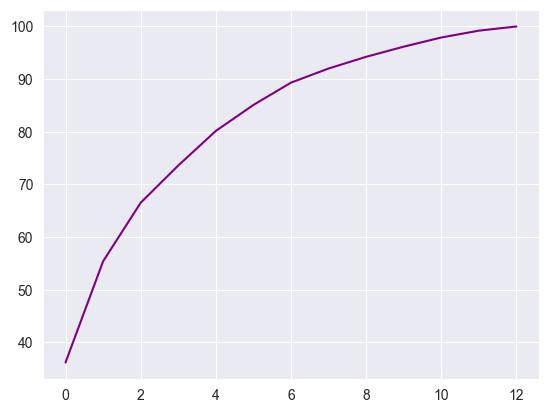

In [581]:
# Variance plot for PCA components obtained 
plt.plot(cum_pvar,color='#800080')

#### *Projecting the data on Eigen Vector* ####

In [582]:
#We are only going to take the top 3 percentages and ignore the rest
pc1 = wine_data_std.dot(eig_vecs.T[0])
pc2 = wine_data_std.dot(eig_vecs.T[2])
pc3 = wine_data_std.dot(eig_vecs.T[3])

In [583]:
pca_data = pd.DataFrame(pc1,columns=['pc1'])
pca_data['pc2'] = pc2
pca_data['pc3'] = pc3
pca_data['target'] = wine['Type']

In [584]:
pca_data

pc1       pc2       pc3  target
0   -3.316751 -0.165739  0.215631       1
1   -2.209465 -2.026457  0.291358       1
2   -2.516740  0.982819 -0.724902       1
3   -3.757066 -0.176192 -0.567983       1
4   -1.008908  2.026688  0.409766       1
..        ...       ...       ...     ...
173  3.370524 -0.342570 -1.058527       3
174  2.601956  0.207581 -0.349496       3
175  2.677839 -0.940942 -0.312035       3
176  2.387017 -0.550696  0.688285       3
177  3.208758  1.013914 -0.596903       3

[178 rows x 4 columns]

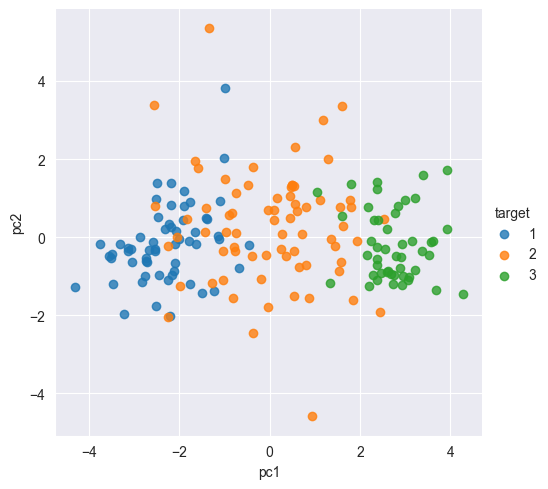

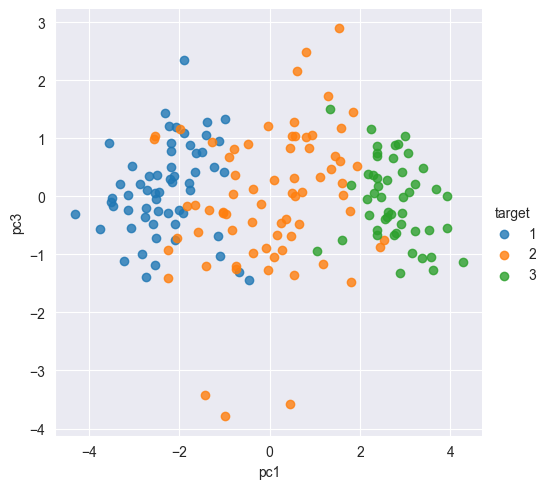

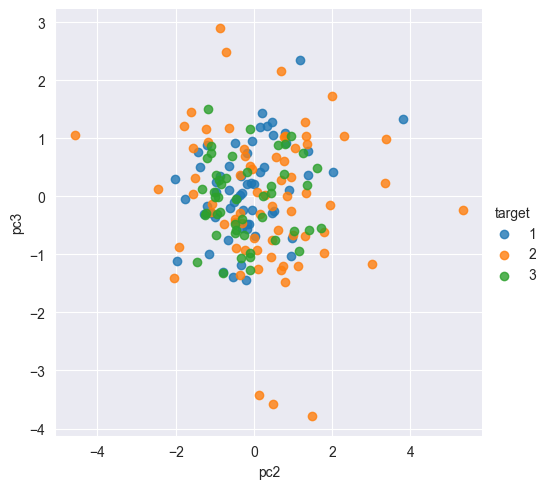

In [585]:
# Drawing a plot with the points
sns.lmplot(x='pc1',y='pc2', data= pca_data, fit_reg=False, hue='target')
sns.lmplot(x='pc1',y='pc3', data= pca_data, fit_reg=False, hue='target')
sns.lmplot(x='pc2',y='pc3', data= pca_data, fit_reg=False, hue='target')

### **USING PCI CLASS - LIBRARY FUNCTION** ###

In [586]:
from sklearn.decomposition import PCA
c_pca = PCA(n_components=3) # Reduce dimensions to 3
c_projected_data = c_pca.fit_transform(wine_data_std)
c_projected_data

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [587]:
# The amount of variance that each PCA explains is
c_pca.explained_variance_ # Here we have chosen the 3 components (as 'n_components=3') to the PCA function. So it will show the variance for those components.

# The 1st column contains 4.73243698 variance, 2nd column contains 2.51108093 and 3rd col contains 1.45424187 variance

array([4.73243698, 2.51108093, 1.45424187])

In [588]:
# In percentage - The amount of variance that each PCA explains is
var = c_pca.explained_variance_ratio_
var

# The similar values are seen when checked earlier while "Extracting Maximum Eigen Values and corresponding Eigen Vectors"
# Using the step -
# for i in range(len(eig_vals)):
#    print(eig_vals[i]/sum(eig_vals))
# 0.3619884809992636
# 0.19207490257008933
# 0.11123630536249998

# The above steps were later altered to capture the cumulative variance, hence change in code.

array([0.36198848, 0.1920749 , 0.11123631])

In [589]:
# Cumulative variance
var1=np.cumsum(np.round(var,decimals=4)*100)
var1 # 36.2   36.2+19.21=55.41   55.41+11.12=66.53. Since we are stopping at the 3rd column we are getting 66.53%

array([36.2 , 55.41, 66.53])

In [590]:
c_pca.components_ # 3 dimensional components

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

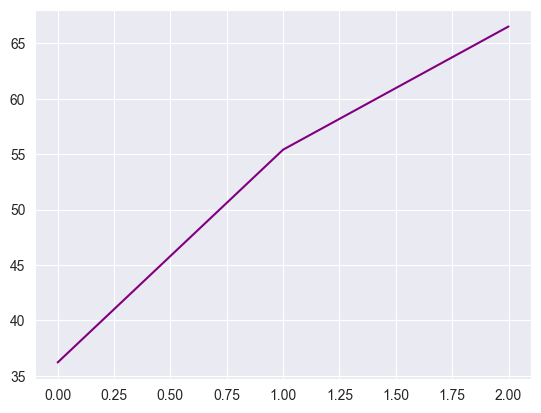

In [591]:
# Variance plot for the 3 PCA components obtained
plt.plot(var1,color='#800080')

In [592]:
pca1 = c_projected_data[:,0]
pca2 = c_projected_data[:,1]
pca3 = c_projected_data[:,2]

In [593]:
c_pca_data = pd.DataFrame(pca1,columns=['PCA1'])
c_pca_data['PCA2'] = pc2
c_pca_data['PCA3'] = pc3
c_pca_data['TARGET'] = wine['Type']
c_pca_data

# Both the DataFrames i.e. 'pci_data' and 'pc_pci_data' are exactly the same

PCA1      PCA2      PCA3  TARGET
0    3.316751 -0.165739  0.215631       1
1    2.209465 -2.026457  0.291358       1
2    2.516740  0.982819 -0.724902       1
3    3.757066 -0.176192 -0.567983       1
4    1.008908  2.026688  0.409766       1
..        ...       ...       ...     ...
173 -3.370524 -0.342570 -1.058527       3
174 -2.601956  0.207581 -0.349496       3
175 -2.677839 -0.940942 -0.312035       3
176 -2.387017 -0.550696  0.688285       3
177 -3.208758  1.013914 -0.596903       3

[178 rows x 4 columns]

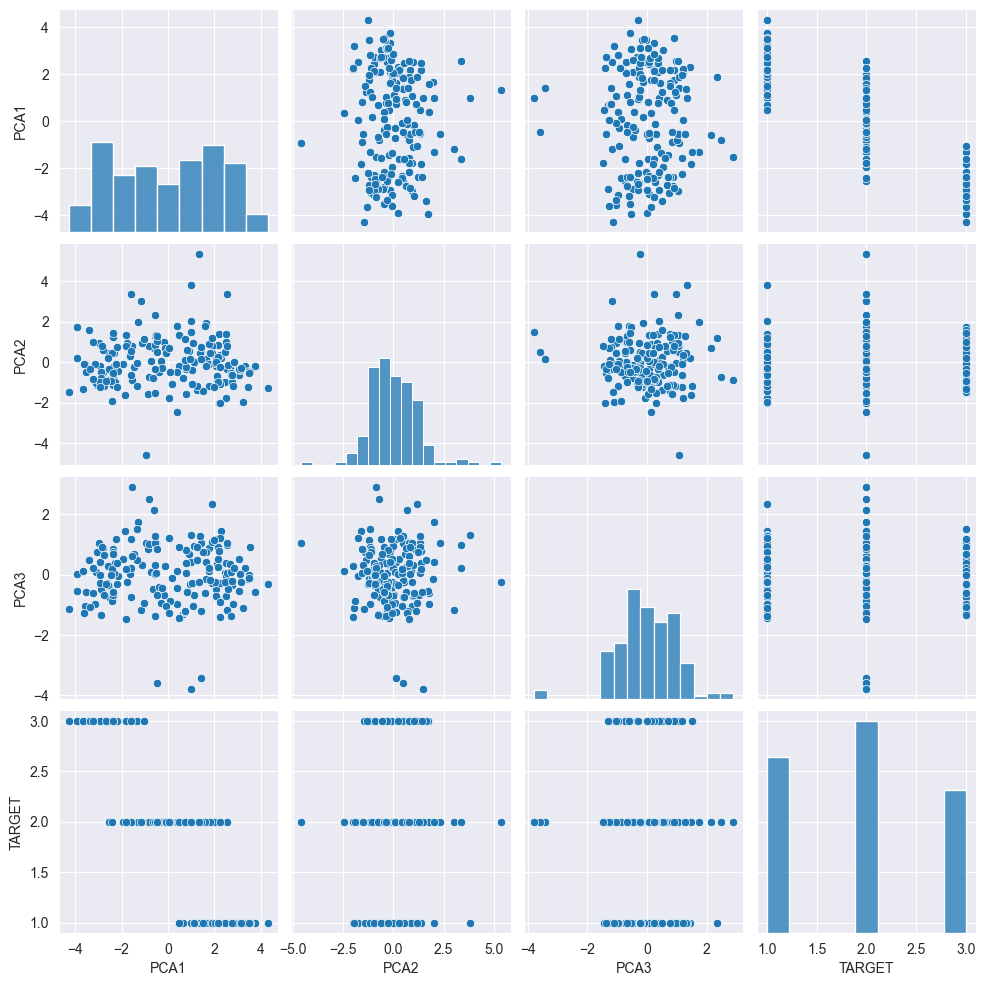

In [639]:
# Format the plot background and scatter plots for all the PCA variables
# The above inferences are seen visually in the below scatter plots
sns.set_style(style='darkgrid')
sns.pairplot(c_pca_data)

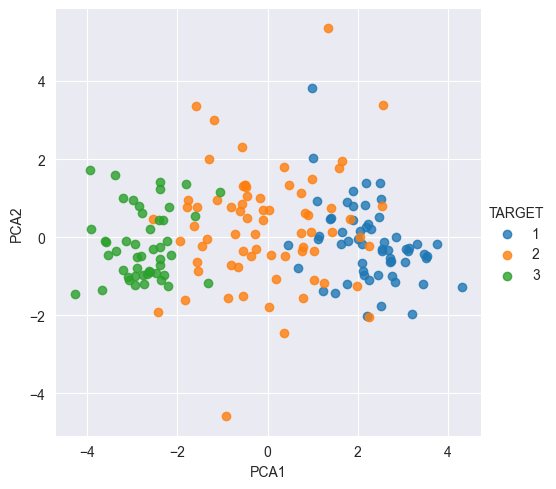

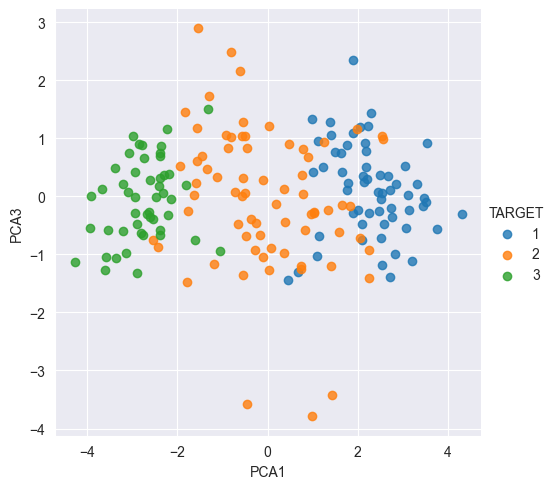

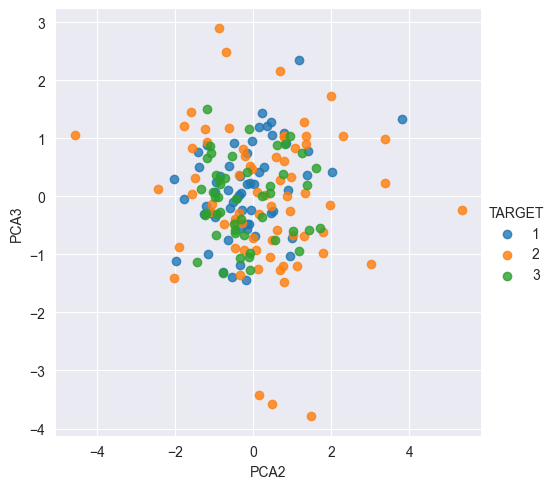

In [594]:
# Drawing a plot with the points
sns.lmplot(x='PCA1',y='PCA2', data= c_pca_data, fit_reg=False, hue='TARGET')
sns.lmplot(x='PCA1',y='PCA3', data= c_pca_data, fit_reg=False, hue='TARGET')
sns.lmplot(x='PCA2',y='PCA3', data= c_pca_data, fit_reg=False, hue='TARGET')

<Axes: >

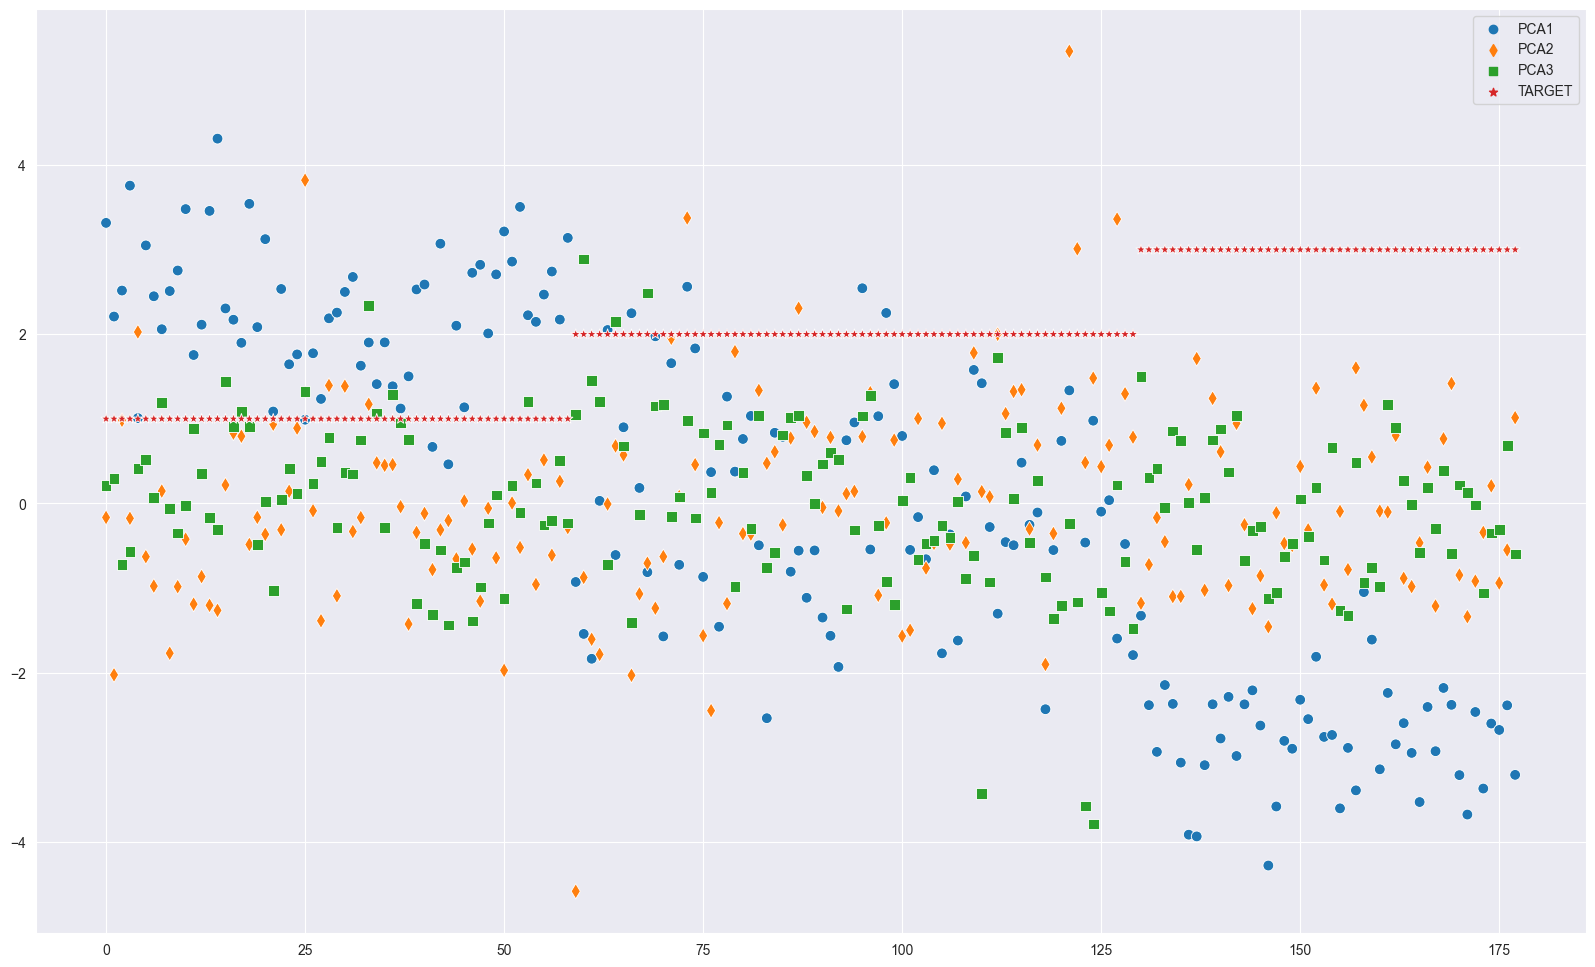

In [595]:
# Visualization of PCAs
fig=plt.figure(figsize=(20,12))
sns.scatterplot(data = c_pca_data, markers=['o','d','s','*'], s=60)

In [596]:
c_pca_data

PCA1      PCA2      PCA3  TARGET
0    3.316751 -0.165739  0.215631       1
1    2.209465 -2.026457  0.291358       1
2    2.516740  0.982819 -0.724902       1
3    3.757066 -0.176192 -0.567983       1
4    1.008908  2.026688  0.409766       1
..        ...       ...       ...     ...
173 -3.370524 -0.342570 -1.058527       3
174 -2.601956  0.207581 -0.349496       3
175 -2.677839 -0.940942 -0.312035       3
176 -2.387017 -0.550696  0.688285       3
177 -3.208758  1.013914 -0.596903       3

[178 rows x 4 columns]

In [597]:
# Cluster Break-up Count.
c_pca_data['TARGET'].value_counts()

# The breakup count should be the same as that of the original DataFrame 'wine' as the 'TARGET' column is the representation of 'Type' column.
# Here we have just reduced the number of dimensions i.e. columns and substituted them with PC1, PC2 and PC3, which represent the original Columns for the 'wine' DataFrame.

TARGET
2    71
1    59
3    48
Name: count, dtype: int64

In [598]:
wine['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [599]:
y = wine['Type']
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

## **HIERARCHICAL CLUSTERING** ##

In [600]:
hc_df_norm = wine_data_std.copy() # Note this data does not contain the 'Type' Column
hc_df_norm.head()

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997    1.034819   
1  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648    0.733629   
2  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997    1.215533   
3  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446    1.466525   
4  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997    0.663351   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  
0      -0.659563         1.224884  0.251717  0.362177  1.847920  1.013009  
1      -0.820719        -0.544721 -0.293321  0.406051  1.113449  0.965242  
2      -0.498407         2.135968  0.269020  0.318304  0.788587  1.395148  
3      -0.981875         1.032155  1.186068 -0.427544  1.184071  2.334574  
4       0.226796         0.401404 -0.319276  0.362177  0.449601 -0.037874

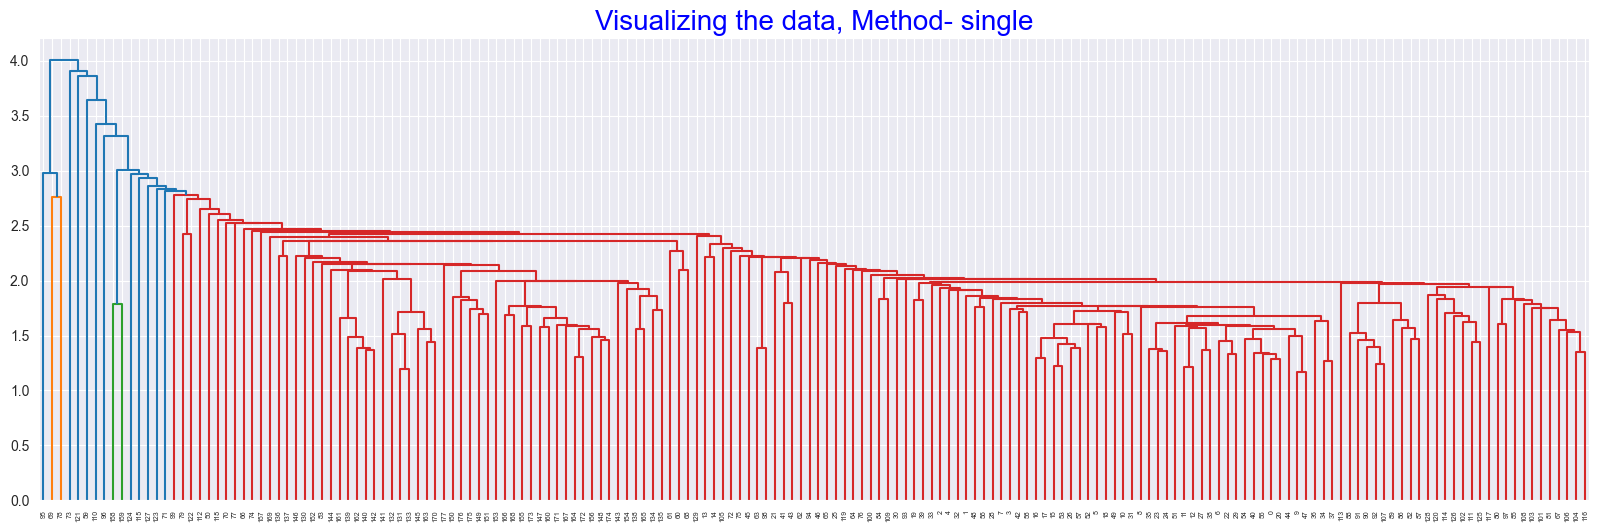

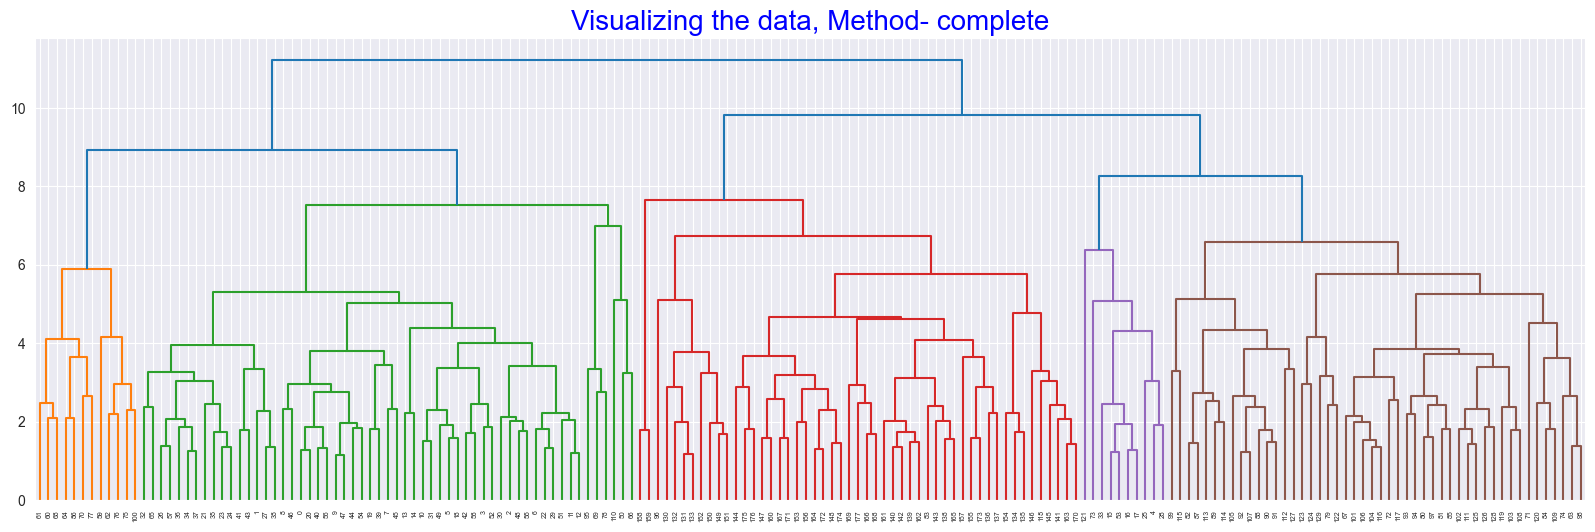

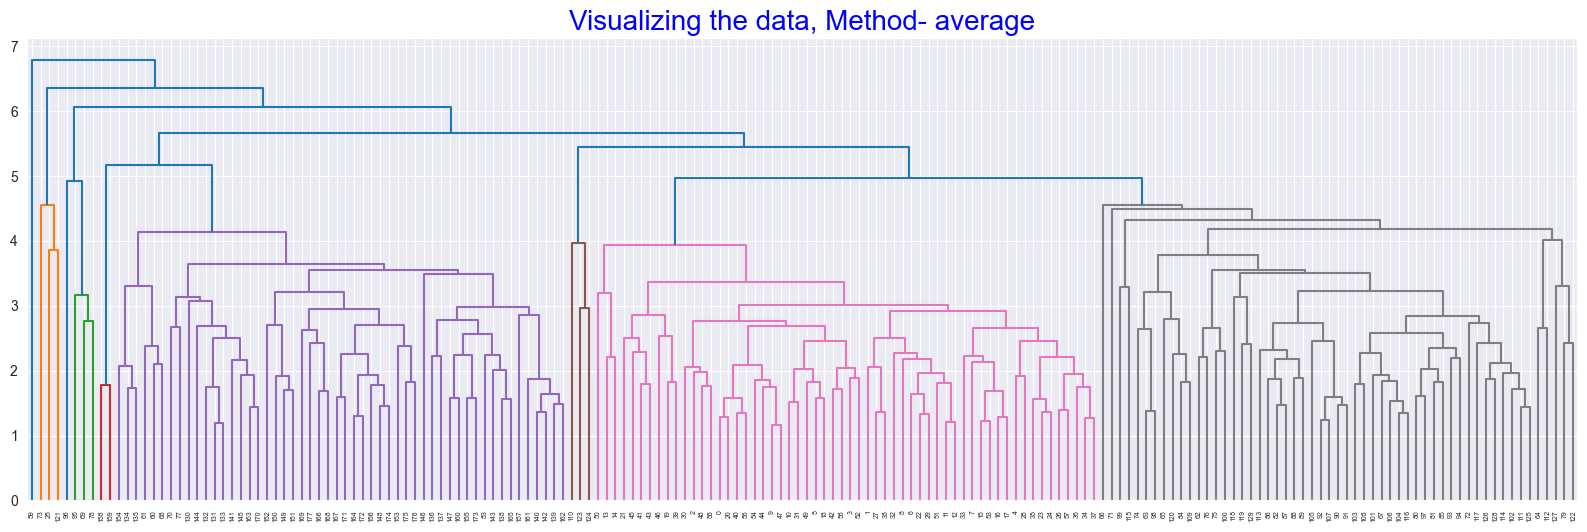

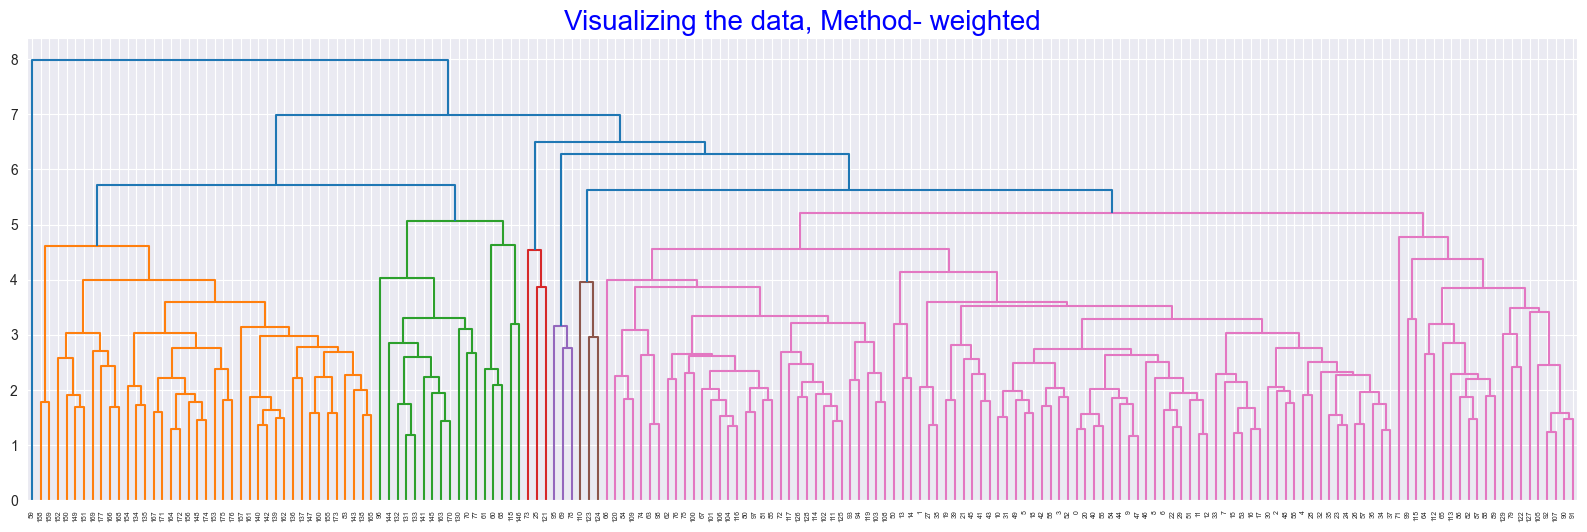

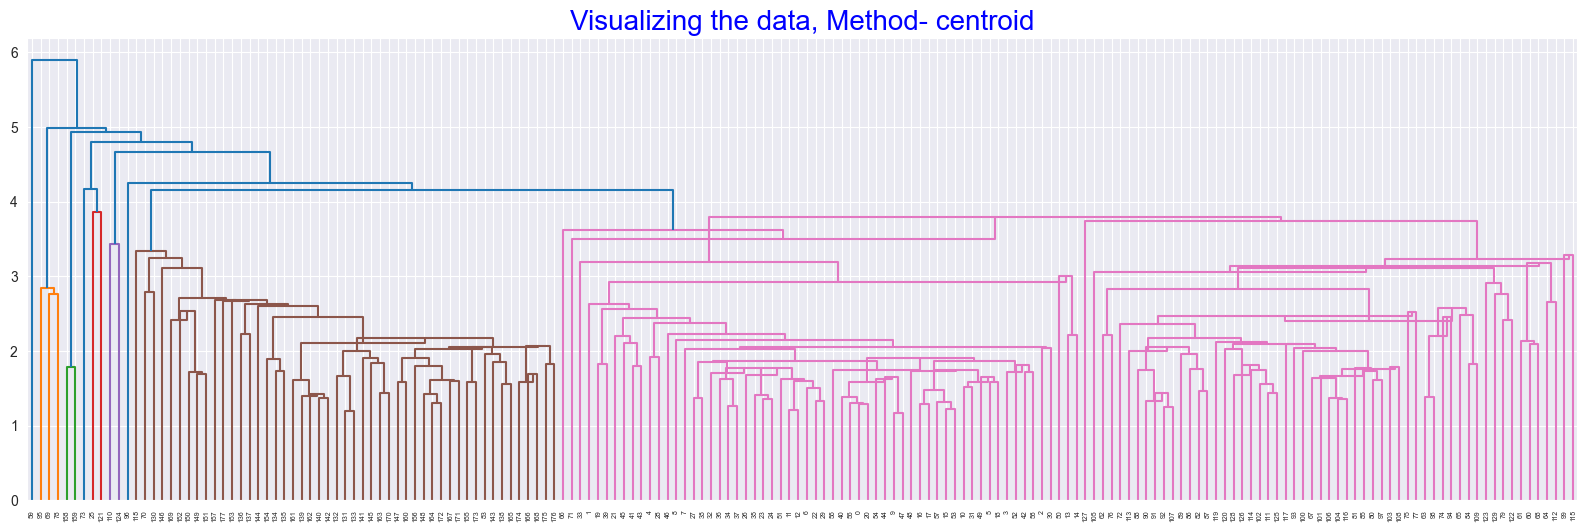

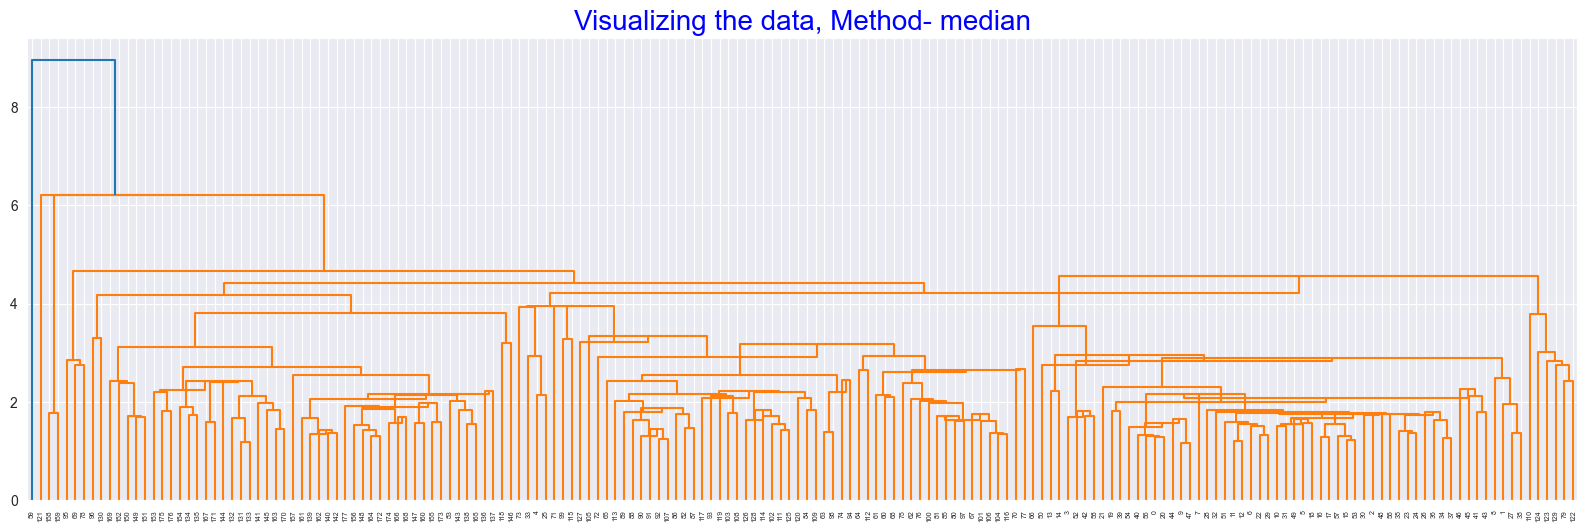

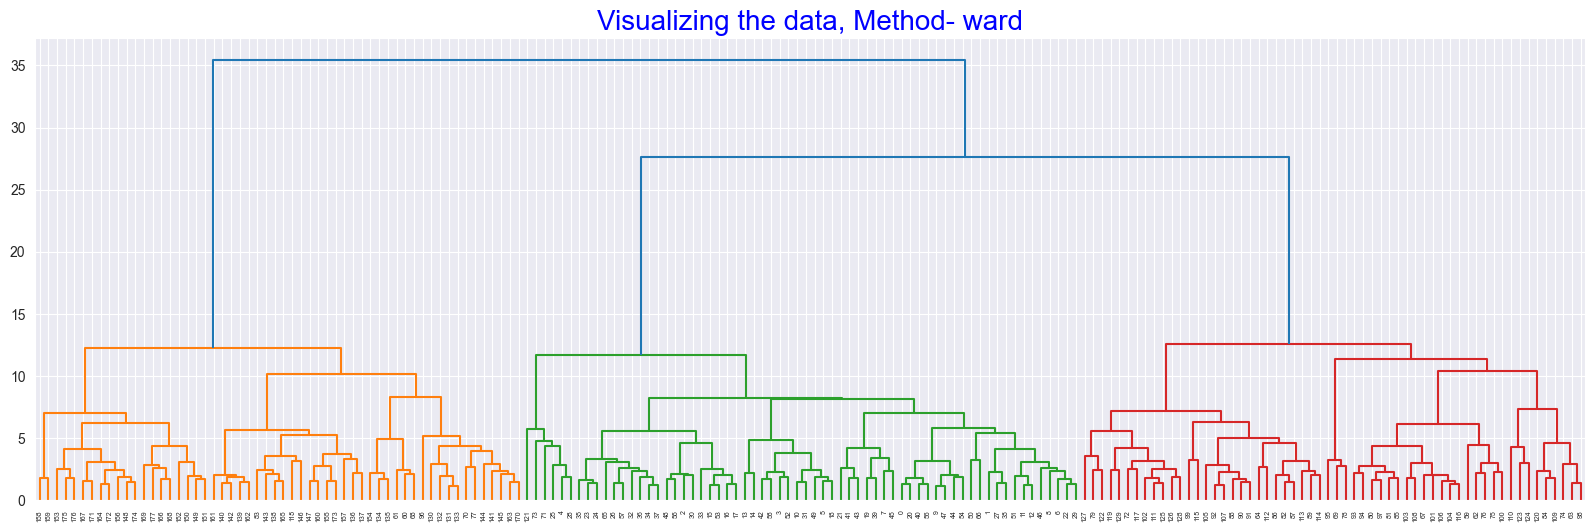

In [601]:
# Applying Dendrogram on the standardized data.
# We are using different linkage methods for understanding it better. 
# Finding the number of clusters using color coding of dendrogram. Each color indicates one cluster.

import scipy.cluster.hierarchy as sch # to build dendrogram and build the plotting

for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))
    dict = {'fontsize':20,'fontweight':10, 'color':'blue'}
    plt.title('Visualizing the data, Method- {}'.format(methods),fontdict = dict)
    dendrogram = sch.dendrogram(sch.linkage(hc_df_norm, method=methods,optimal_ordering=False))

#### **Inferences:** ####
1. Based on the visualization, we see that the model which best demarcates the clusters is the 'ward' method.
2. The next best alternative method appears to be the 'complete' method, which demarkates the clusters in a better way.

Based on the Elbow Chart seen below as part of K-Means we see that best option is to take **3 clusters** and alternatively **4 clusters**

*It does not make any sense to go for >5 clusters.*

### **Creation of the Model** ###

### ***3 Clusters using 'Ward' Method*** ###

In [602]:
# Creating clusters based on the inferences gathered - creating 3 clusters using 'ward' method
model_hc_w_3 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
model_hc_w_3

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [603]:
# Saving the data for 3 clusters using 'ward' method
data_hc_w_3 = model_hc_w_3.fit_predict(hc_df_norm) # Applying fit_predict method on dataset hc_df_norm. We will get cluster nos. in data_hc_w_3
clusters_w_3=pd.DataFrame(data_hc_w_3,columns=['HC_W_4']) # Saving the cluster numbers in clusters_w_3 to update original dataframe
clusters_w_3.head()

HC_W_4
0       2
1       2
2       2
3       2
4       2

In [604]:
# Now let us map this cluster membership to the data points
wine['HC_W_3'] = clusters_w_3
hc_df_norm['HC_W_3'] = clusters_w_3
wine.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  HC_W_3  
0           0.28             2.29   5.64  1.04      3.92     1065       2  
1           0.26             1.28   4.38  1.05      3.40     1050       2  
2           0.30             2.81   5.68  1.03      3.17     1185       2  
3           0.24             2.18   7.80  0.86      3.45     1480       2  
4           0.39             1.82   4.32  1.04      2.93      735       2

### ***3 Clusters using 'Complete' Method*** ###

In [605]:
# Creating clusters based on the inferences gathered - creating 3 clusters using complete method
model_hc_c_3 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
model_hc_c_3

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [606]:
# Saving the data for 3 clusters using 'complete' method
data_hc_c_3 = model_hc_c_3.fit_predict(hc_df_norm) # Apply fit_predict method on dataset hc_df_norm. We will get cluster nos. in data_hc_c_3
clusters_c_3=pd.DataFrame(data_hc_c_3,columns=['HC_C_4']) # Saving the cluster numbers in clusters_c_3 to update original dataframe
clusters_c_3.head()

HC_C_4
0       0
1       0
2       0
3       0
4       1

In [607]:
# Now let us map this cluster membership to the data points
wine['HC_C_3'] = clusters_c_3
hc_df_norm['HC_C_3'] = clusters_c_3
hc_df_norm['Type'] = wine['Type']
wine.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  HC_W_3  \
0           0.28             2.29   5.64  1.04      3.92     1065       2   
1           0.26             1.28   4.38  1.05      3.40     1050       2   
2           0.30             2.81   5.68  1.03      3.17     1185       2   
3           0.24             2.18   7.80  0.86      3.45     1480       2   
4           0.39             1.82   4.32  1.04      2.93      735       2   

   HC_C_3  
0       0  
1       0  
2       0  
3       0  
4       1

### **Visualization** ###

In [608]:
# 3 Clusters 'Ward' Method
hc_df_norm['HC_W_3'].value_counts()

HC_W_3
2    64
0    58
1    56
Name: count, dtype: int64

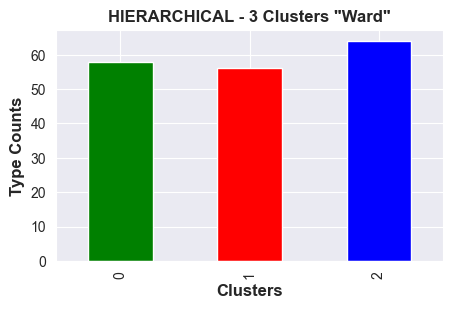

In [609]:
# 3 Clusters 'Ward' Method, Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['green', 'red', 'blue', 'orange']
fig, ax = plt.subplots(figsize=(5, 3))
hc_df_norm.groupby(['HC_W_3']).count()['Type'].plot(kind='bar', color=bar_colors)
plt.ylabel('Type Counts')
plt.title('HIERARCHICAL - 3 Clusters "Ward"',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Type Counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

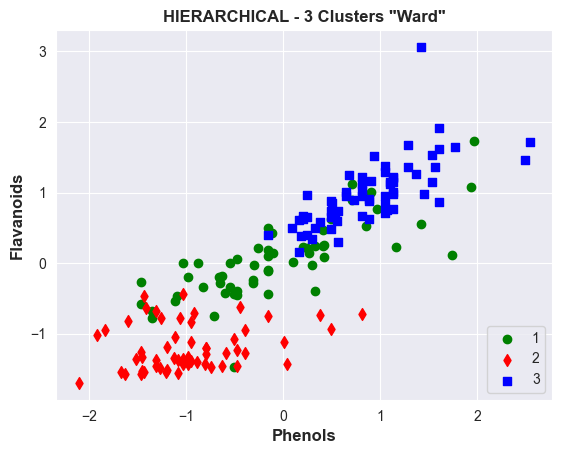

In [610]:
# Scatter Plot Visual for 3 Clusters 'Ward' Method
# Choosing 'Phenols' and 'Flavanoids' to plot the scatter plot

df1 = hc_df_norm[hc_df_norm.HC_W_3==0]
df2 = hc_df_norm[hc_df_norm.HC_W_3==1]
df3 = hc_df_norm[hc_df_norm.HC_W_3==2]

plt.scatter(df1['Phenols'],df1['Flavanoids'], color='green', marker='o', label='1')
plt.scatter(df2['Phenols'],df2['Flavanoids'], color='red', marker='d', label='2')
plt.scatter(df3['Phenols'],df3['Flavanoids'], color='blue', marker='s', label='3')

plt.title('HIERARCHICAL - 3 Clusters "Ward"',fontsize='large',fontweight='bold')
plt.xlabel('Phenols', fontsize='large', fontweight='bold')
plt.ylabel('Flavanoids', fontsize='large', fontweight='bold')

plt.legend(loc='lower right')


In [611]:
# 4 Clusters 'Complete' Method
hc_df_norm['HC_C_3'].value_counts()

HC_C_3
0    69
1    58
2    51
Name: count, dtype: int64

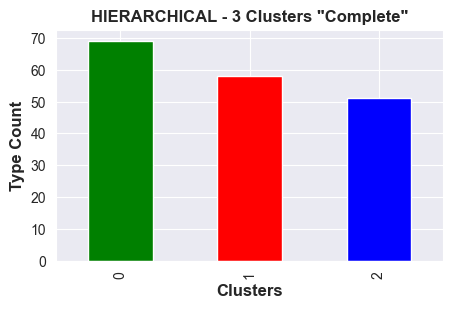

In [612]:
# 3 Clusters 'Complete' Method, Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['green', 'red', 'blue', 'orange']
fig, ax = plt.subplots(figsize=(5, 3))
hc_df_norm.groupby(['HC_C_3']).count()['Type'].plot(kind='bar', color=bar_colors)
plt.ylabel('Type Count')
plt.title('HIERARCHICAL - 3 Clusters "Complete"',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Type Count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

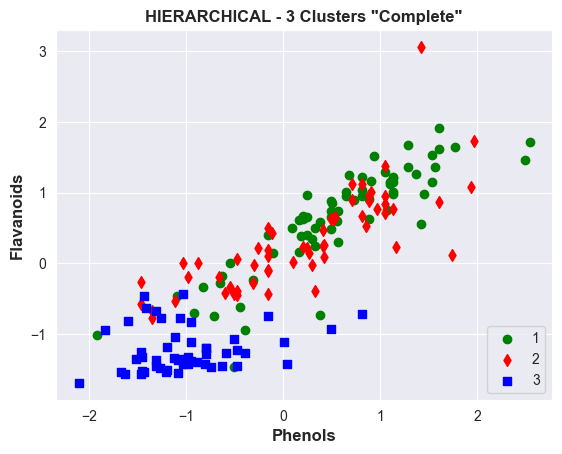

In [613]:
# Scatter Plot Visual for 3 Clusters 'Complete' Method
# Choosing 'Phenols' and 'Flavanoids' to plot the scatter plot

df1 = hc_df_norm[hc_df_norm.HC_C_3==0]
df2 = hc_df_norm[hc_df_norm.HC_C_3==1]
df3 = hc_df_norm[hc_df_norm.HC_C_3==2]

plt.scatter(df1['Phenols'],df1['Flavanoids'], color='green', marker='o', label='1')
plt.scatter(df2['Phenols'],df2['Flavanoids'], color='red', marker='d', label='2')
plt.scatter(df3['Phenols'],df3['Flavanoids'], color='blue', marker='s', label='3')

plt.title('HIERARCHICAL - 3 Clusters "Complete"',fontsize='large',fontweight='bold')
plt.xlabel('Phenols', fontsize='large', fontweight='bold')
plt.ylabel('Flavanoids', fontsize='large', fontweight='bold')

plt.legend(loc='lower right')


In [614]:
# The wine dataframe having the 2 new columns for 3 clusters using 'Ward' and 'Complete' Methods
wine.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  HC_W_3  \
0           0.28             2.29   5.64  1.04      3.92     1065       2   
1           0.26             1.28   4.38  1.05      3.40     1050       2   
2           0.30             2.81   5.68  1.03      3.17     1185       2   
3           0.24             2.18   7.80  0.86      3.45     1480       2   
4           0.39             1.82   4.32  1.04      2.93      735       2   

   HC_C_3  
0       0  
1       0  
2       0  
3       0  
4       1

In [615]:
# Cluster Break-up Count
wine['HC_W_3'].value_counts()

HC_W_3
2    64
0    58
1    56
Name: count, dtype: int64

In [616]:
# Cluster Break-up Count
wine['HC_C_3'].value_counts()

HC_C_3
0    69
1    58
2    51
Name: count, dtype: int64

In [617]:
wine['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [618]:
wine[['Type','HC_C_3']]

Type  HC_C_3
0       1       0
1       1       0
2       1       0
3       1       0
4       1       1
..    ...     ...
173     3       2
174     3       2
175     3       2
176     3       2
177     3       2

[178 rows x 2 columns]

- **We can observe that the counts for the Hierarchical Complete Clustering are very close to the cluster count for the Y parameter i.e. 'Type' for the original DataFrame 'wine'.**
- **In other words, both are almost giving us the same clusters, so the PCA concept does reduce the dimensions, without changing the properties much**

## **K-MEANS CLUSTERING** ##

### **Using Elbow Plot to arrive at the best count for the sample** ###

In [619]:
km_df_norm = wine_data_std.copy() # This dataframe contains the standardized data and does not include the 'Type' column
km_df_norm.head()

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997    1.034819   
1  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648    0.733629   
2  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997    1.215533   
3  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446    1.466525   
4  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997    0.663351   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  
0      -0.659563         1.224884  0.251717  0.362177  1.847920  1.013009  
1      -0.820719        -0.544721 -0.293321  0.406051  1.113449  0.965242  
2      -0.498407         2.135968  0.269020  0.318304  0.788587  1.395148  
3      -0.981875         1.032155  1.186068 -0.427544  1.184071  2.334574  
4       0.226796         0.401404 -0.319276  0.362177  0.449601 -0.037874

In [620]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(km_df_norm)
    sse.append(km.inertia_)
sse

[2314.0,
 1658.7588524290954,
 1277.928488844642,
 1180.7026689551885,
 1114.9461534784034,
 1040.2266136526275,
 1003.1167622857577,
 938.4382593753561,
 889.9054518026308]

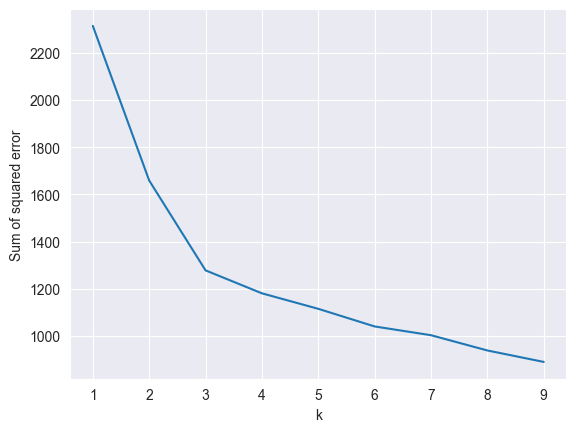

In [621]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

# According to the graph the best cluster size is 3. After that it is fairly constant. As an alternative, we can take 4 at max.
# Any cluster size above 4 does not make sense.

#### **Inferences:** ####
1. We see a drastic change in the graph after 3 samples.
2. We don't see much change after 3 clusters with a small change seen at 4 samples

So **3 clusters** should be taken.
The next best option is **4 clusters**.

To be on the same side, we can go for 3 clusters. 4 clusters could also be considered, based on client's need.

*It does not make any sense to go for >4 clusters.*

In [622]:
prediction_df = pd.DataFrame()

clusters = [3,4]

for cluster in pd.Series(clusters):
    kmeans = KMeans(n_clusters=cluster,random_state=0) # pass no. of clusters
    pred = 'KM_CLUSTER_' + str(cluster)
    wine[pred] = kmeans.fit_predict(km_df_norm)
    prediction_df[pred] = kmeans.fit_predict(km_df_norm)
    km_df_norm[pred] = kmeans.fit_predict(km_df_norm)

km_df_norm['Type'] = wine['Type']
prediction_df.head()

KM_CLUSTER_3  KM_CLUSTER_4
0             2             2
1             2             2
2             2             2
3             2             2
4             2             2

In [623]:
km_df_norm

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0    1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997   
1    0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648   
2    0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997   
3    1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446   
4    0.295700  0.227694  1.840403    0.451946   1.281985  0.808997   
..        ...       ...       ...         ...        ...       ...   
173  0.876275  2.974543  0.305159    0.301803  -0.332922 -0.985614   
174  0.493343  1.412609  0.414820    1.052516   0.158572 -0.793334   
175  0.332758  1.744744 -0.389355    0.151661   1.422412 -1.129824   
176  0.209232  0.227694  0.012732    0.151661   1.422412 -1.033684   
177  1.395086  1.583165  1.365208    1.502943  -0.262708 -0.392751   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      1.034819      -0.659563         1.224884  0.251717  0.362177  1.847920   
1      0.733629      -0.820719        -0.544721 -0.293321  0.406051  1.113449   
2      1.215533      -0.498407         2.135968  0.269020  0.318304  0.788587   
3      1.466525      -0.981875         1.032155  1.186068 -0.427544  1.184071   
4      0.663351       0.226796         0.401404 -0.319276  0.362177  0.449601   
..          ...            ...              ...       ...       ...       ...   
173   -1.424900       1.274310        -0.930179  1.142811 -1.392758 -1.231206   
174   -1.284344       0.549108        -0.316950  0.969783 -1.129518 -1.485445   
175   -1.344582       0.549108        -0.422075  2.224236 -1.612125 -1.485445   
176   -1.354622       1.354888        -0.229346  1.834923 -1.568252 -1.400699   
177   -1.274305       1.596623        -0.422075  1.791666 -1.524378 -1.428948   

      Proline  KM_CLUSTER_3  KM_CLUSTER_4  Type  
0    1.013009             2             2     1  
1    0.965242             2             2     1  
2    1.395148             2             2     1  
3    2.334574             2             2     1  
4   -0.037874             2             2     1  
..        ...           ...           ...   ...  
173 -0.021952             1             0     3  
174  0.009893             1             0     3  
175  0.280575             1             0     3  
176  0.296498             1             0     3  
177 -0.595160             1             0     3  

[178 rows x 16 columns]

In [624]:
df_pred3_clus1 = km_df_norm[km_df_norm['KM_CLUSTER_3']==0]
df_pred3_clus2 = km_df_norm[km_df_norm['KM_CLUSTER_3']==1]
df_pred3_clus3 = km_df_norm[km_df_norm['KM_CLUSTER_3']==2]

df_pred4_clus1 = km_df_norm[km_df_norm['KM_CLUSTER_4']==0]
df_pred4_clus2 = km_df_norm[km_df_norm['KM_CLUSTER_4']==1]
df_pred4_clus3 = km_df_norm[km_df_norm['KM_CLUSTER_4']==2]
df_pred4_clus4 = km_df_norm[km_df_norm['KM_CLUSTER_4']==3]

In [625]:
# 3 Clusters
km_df_norm['KM_CLUSTER_3'].value_counts()

KM_CLUSTER_3
0    65
2    62
1    51
Name: count, dtype: int64

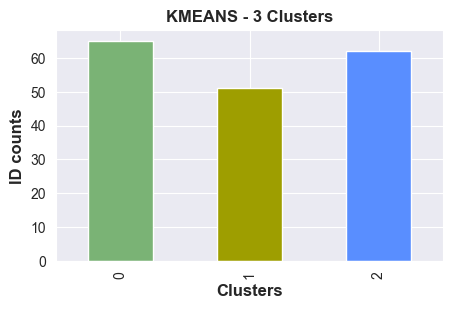

In [626]:
# 3 Clusters Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['#7ab375', '#9e9e00', '#598eff']
fig, ax = plt.subplots(figsize=(5, 3))
km_df_norm.groupby(['KM_CLUSTER_3']).count()['Type'].plot(kind='bar', color=bar_colors)
plt.ylabel('Type Counts')
plt.title('KMEANS - 3 Clusters',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

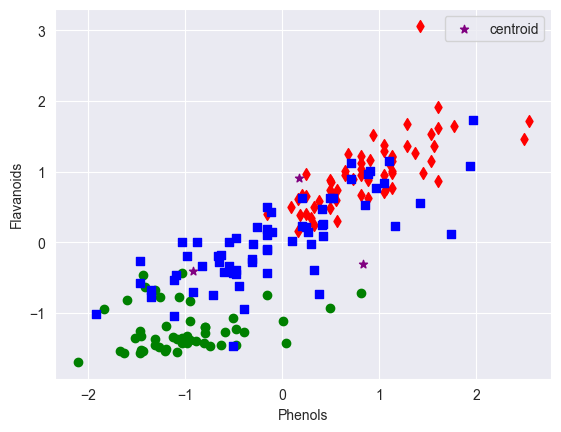

In [627]:
# Creating the Scatter Plot Visual for 3 clusters
# Choosing 'Phenols' and 'Flavanoids' to plot the scatter plot

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(km_df_norm)
y_predicted
km_df_norm['KM_CLUSTER_3'] = y_predicted

km_df_norm.head()

df1 = km_df_norm[km_df_norm.KM_CLUSTER_3==0]
df2 = km_df_norm[km_df_norm.KM_CLUSTER_3==1]
df3 = km_df_norm[km_df_norm.KM_CLUSTER_3==2]

plt.scatter(df1['Phenols'],df1['Flavanoids'], color='green', marker='o')
plt.scatter(df2['Phenols'],df2['Flavanoids'], color='red', marker='d')
plt.scatter(df3['Phenols'],df3['Flavanoids'], color='blue', marker='s')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*', label = 'centroid')
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.legend()


In [628]:
# 4 Clusters
km_df_norm['KM_CLUSTER_4'].value_counts()

KM_CLUSTER_4
2    62
0    50
1    41
3    25
Name: count, dtype: int64

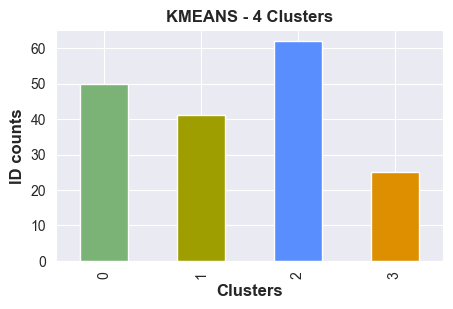

In [629]:
# 4 Clusters Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['#7ab375', '#9e9e00', '#598eff', '#de8f00']
fig, ax = plt.subplots(figsize=(5, 3))
km_df_norm.groupby(['KM_CLUSTER_4']).count()['Type'].plot(kind='bar', color=bar_colors)
plt.ylabel('Type Counts')
plt.title('KMEANS - 4 Clusters',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

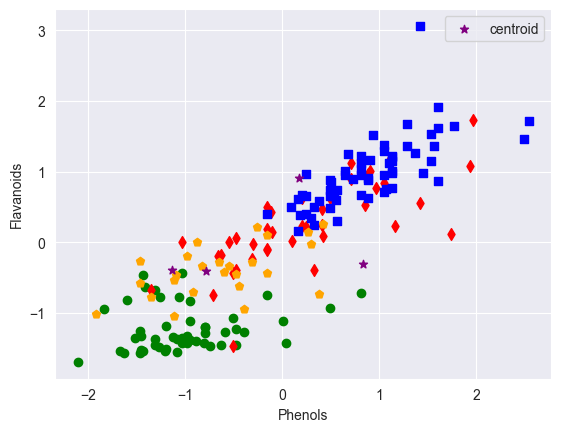

In [630]:
# Creating the Scatter Plot Visual for 4 clusters
# Choosing 'Phenols' and 'Flavanoids' to plot the scatter plot

km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(km_df_norm)
y_predicted
km_df_norm['KM_CLUSTER_4'] = y_predicted

km_df_norm.head()

km.cluster_centers_

df1 = km_df_norm[km_df_norm.KM_CLUSTER_4==0]
df2 = km_df_norm[km_df_norm.KM_CLUSTER_4==1]
df3 = km_df_norm[km_df_norm.KM_CLUSTER_4==2]
df4 = km_df_norm[km_df_norm.KM_CLUSTER_4==3]

plt.scatter(df1['Phenols'],df1['Flavanoids'], color='green', marker='o')
plt.scatter(df2['Phenols'],df2['Flavanoids'], color='red', marker='d')
plt.scatter(df3['Phenols'],df3['Flavanoids'], color='blue', marker='s')
plt.scatter(df4['Phenols'],df4['Flavanoids'], color='orange', marker='p')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*', label = 'centroid')
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.legend()


#### **The demarcation is more clear with 3 clusters than with 4 clusters. So we will go with 3 clusters only** ####

## **Comparision of Clusters** ##

##### *'Type' column in Original DataFrame* ####

Type
2    71
1    59
3    48
Name: count, dtype: int64


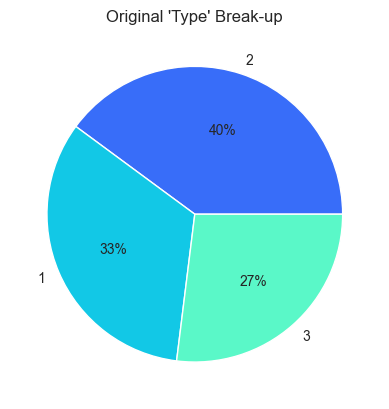

In [631]:
# The original DataFrame 'Type' Cluster Break-up Count

orig = wine['Type'].value_counts()
print(orig)

# Segregation of the wine 'Type', which is the y parameter

import matplotlib.pyplot as plt
import seaborn as sns

palette_color = sns.color_palette('rainbow')[0:7]

# Display state data in a form of Pie Graph
values = wine['Type'].value_counts().keys().tolist()
counts = wine['Type'].value_counts().tolist()
values, counts
plt.pie(wine['Type'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')
plt.title('Original \'Type\' Break-up')
plt.show()

##### *'Hierarchical Clustering - Ward'* ####

HC_C_3
0    69
1    58
2    51
Name: count, dtype: int64


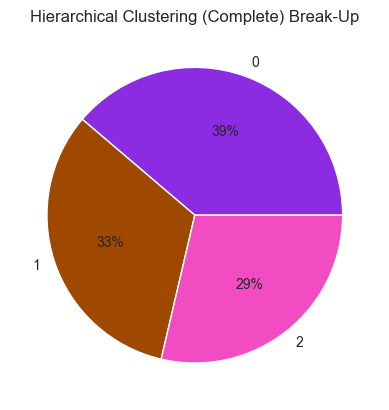

In [632]:
# Cluster Break-up Count
hc3_clusters = wine['HC_C_3'].value_counts()
print(hc3_clusters)

# Segregation of the wine 'Type', which is the y parameter

import matplotlib.pyplot as plt
import seaborn as sns

palette_color = sns.color_palette('bright')[4:7]

# Display state data in a form of Pie Graph
values = wine['HC_C_3'].value_counts().keys().tolist()
counts = wine['HC_C_3'].value_counts().tolist()
values, counts
plt.pie(wine['HC_C_3'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')
plt.title('Hierarchical Clustering (Complete) Break-Up')
plt.show()

HC_W_3
2    64
0    58
1    56
Name: count, dtype: int64


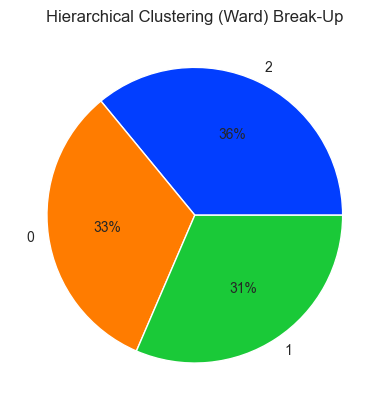

In [633]:
# Cluster Break-up Count
hc3_clusters = wine['HC_W_3'].value_counts()
print(hc3_clusters)

# Segregation of the wine 'Type', which is the y parameter

import matplotlib.pyplot as plt
import seaborn as sns

palette_color = sns.color_palette('bright')[0:3]

# Display state data in a form of Pie Graph
values = wine['HC_W_3'].value_counts().keys().tolist()
counts = wine['HC_W_3'].value_counts().tolist()
values, counts
plt.pie(wine['HC_W_3'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')
plt.title('Hierarchical Clustering (Ward) Break-Up')
plt.show()

##### *'K-Means' Clustering* ####

KM_CLUSTER_3
0    65
2    62
1    51
Name: count, dtype: int64


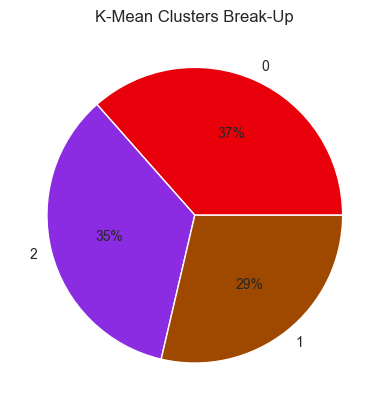

In [634]:
# Cluster Break-up Count
km_clusters = wine['KM_CLUSTER_3'].value_counts()
print(km_clusters)

# Segregation of the wine 'Type', which is the y parameter

import matplotlib.pyplot as plt
import seaborn as sns

palette_color = sns.color_palette('bright')[3:7]

# Display state data in a form of Pie Graph
values = wine['KM_CLUSTER_3'].value_counts().keys().tolist()
counts = wine['KM_CLUSTER_3'].value_counts().tolist()
values, counts
plt.pie(wine['KM_CLUSTER_3'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')
plt.title('K-Mean Clusters Break-Up')
plt.show()

- **We can observe that the counts for the K-Means clustering is similar to the cluster count for the Y parameter i.e. 'Type' for the original DataFrame 'wine'.**
- **In other words, both are almost giving us the same clusters, so the PCA concept does reduce the dimensions, without changing the properties much**

In [635]:
# Grouping data by Hierarchical Clustering = 3 i.e. 'HC_CLUSTER_3'
wine.groupby('KM_CLUSTER_3').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                  mean       mean      mean      mean       mean        mean   
KM_CLUSTER_3                                                                   
0             2.000000  12.250923  1.897385  2.231231  20.063077   92.738462   
1             2.941176  13.134118  3.307255  2.417647  21.241176   98.666667   
2             1.048387  13.676774  1.997903  2.466290  17.462903  107.967742   

               Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                  mean       mean          mean            mean      mean   
KM_CLUSTER_3                                                                
0             2.247692   2.050000      0.357692        1.624154  2.973077   
1             1.683922   0.818824      0.451961        1.145882  7.234706   
2             2.847581   3.003226      0.292097        1.922097  5.453548   

                   Hue  Dilution      Proline    HC_W_3    HC_C_3 KM_CLUSTER_4  
                  mean      mean         mean      mean      mean         mean  
KM_CLUSTER_3                                                                    
0             1.062708  2.803385   510.169231  0.169231  0.769231     1.738462  
1             0.691961  1.696667   619.058824  1.000000  1.960784     0.058824  
2             1.065484  3.163387  1100.225806  1.967742  0.161290     2.000000

In [636]:
# Grouping data by Hierarchical Complete Clustering = 3 i.e. 'HC_C_3'
wine.groupby('HC_C_3').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
            mean       mean      mean      mean       mean        mean   
HC_C_3                                                                   
0       1.260870  13.406087  1.898986  2.305797  16.772464  105.000000   
1       1.862069  12.415172  1.989828  2.381379  21.117241   93.844828   
2       2.941176  13.117843  3.322157  2.431765  21.333333   99.333333   

         Phenols Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
            mean       mean          mean            mean      mean      mean   
HC_C_3                                                                          
0       2.643913   2.668986      0.296667        1.832899  4.990725  1.069652   
1       2.424828   2.339828      0.366897        1.678103  3.280345  1.057931   
2       1.675686   0.810588      0.444314        1.164314  7.170980  0.691373   

        Dilution     Proline    HC_W_3 KM_CLUSTER_3 KM_CLUSTER_4  
            mean        mean      mean         mean         mean  
HC_C_3                                                            
0       2.970000  984.695652  1.608696     1.521739     1.985507  
1       2.978448  573.379310  0.379310     0.344828     1.724138  
2       1.709804  622.490196  1.000000     0.980392     0.058824

In [637]:
# Grouping data by Hierarchical Ward Clustering = 3 i.e. 'HC_C_3'
wine.groupby('HC_W_3').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
            mean       mean      mean      mean       mean        mean   
HC_W_3                                                                   
0       2.000000  12.203966  1.938966  2.215172  20.208621   92.551724   
1       2.857143  13.061607  3.166607  2.412857  21.003571   99.857143   
2       1.078125  13.669219  1.970000  2.463125  17.528125  106.156250   

         Phenols Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
            mean       mean          mean            mean      mean      mean   
HC_W_3                                                                          
0       2.262931   2.088103      0.355345        1.686552  2.895345  1.060000   
1       1.694286   0.847857      0.449464        1.129286  6.850179  0.721000   
2       2.850000   3.009688      0.291094        1.908125  5.450000  1.071406   

        Dilution      Proline    HC_C_3 KM_CLUSTER_3 KM_CLUSTER_4  
            mean         mean      mean         mean         mean  
HC_W_3                                                             
0       2.862241   501.431034  0.810345     0.034483     1.672414  
1       1.727321   624.946429  1.821429     0.910714     0.321429  
2       3.158437  1076.046875  0.171875     1.906250     1.953125

In [638]:
# Grouping data by Original DataFrame's Y i.e. "Type" column
wine.groupby('Type').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028   94.549296  2.258873   
3     13.153750  3.333750  2.437083  21.416667   99.312500  1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1      2.982373      0.290000        1.899322  5.528305  1.062034  3.157797   
2      2.080845      0.363662        1.630282  3.086620  1.056282  2.785352   
3      0.781458      0.447500        1.153542  7.396250  0.682708  1.683542   

          Proline    HC_W_3    HC_C_3 KM_CLUSTER_3 KM_CLUSTER_4  
             mean      mean      mean         mean         mean  
Type                                                             
1     1115.711864  2.000000  0.135593     2.000000      2.00000  
2      519.507042  0.253521  0.788732     0.126761      1.71831  
3      629.895833  1.000000  2.000000     1.000000      0.00000

#### **INFERENCE:** ####

- **We can observe that the Averages for the K-Means clustering, Hierarchial Clustering are similar to that for the Original Data after PCA was done.**
- **The 3 clusters have negliglable amount of difference compared to original DataFrame Feature/Columns**
- **They are almost giving us the same clusters, so the PCA concept does reduce the dimensions, without changing the properties much, so we almost get the same results**